In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500) # This will display maximum 500 columns
pd.set_option('display.max_rows', 500)

APPLICATION DATA ANALYSIS

In [4]:
application_data = pd.read_csv(r"..\LoanDataAnalysis\data\application_data.csv")
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
print(application_data.shape,'\n')
print(application_data.columns)

(307511, 122) 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


We can see that, there are nearly 307511 rows and 122 columns present in the Application Dataset.

In [6]:
print(application_data.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None 



info() will give the details about the variables present in the Dataframe. I am using describe() to get the statics calculations and style for design the output

In [7]:
application_data.describe().style.set_properties(**{"background-color": "#FBEEE6","color":"#212F3D","border": "1.5px solid black"})

Data Cleaning:

Checking null values present in each of the columns and calculating the percentage of it.

In [8]:
null_percentage_column_wise = application_data.isnull().mean() * 100 
print(null_percentage_column_wise)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
#Sort the Percentage values
null_percentage_column_wise.sort_values(ascending = False)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

First i calculated the mean value of the null value present in each column, then multiply with 100. So, it gave me the result of null value percentage of each column.

Remove those columns which are having more than 40% null values

In [10]:
higher_null_value_cols = null_percentage_column_wise[null_percentage_column_wise.values >=40.00].index.tolist()

Checked the values which are more than 40% and create a list of those column

In [11]:
len(higher_null_value_cols)

49

There are 49 columns which are having more 40% of null values. I can drop those columns now.

In [12]:
application_data.drop(higher_null_value_cols, axis =1, inplace = True)

In [13]:
application_data.shape

(307511, 73)

As you can see, there are only 73 columns left in this dataframe now as we already removed the other 49% due to null value percentage issue.

In [14]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [15]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Getting Categorical Columns

In [16]:
print(application_data.select_dtypes(include='object').columns,'\n')
print('Total Column Size of Categorical Columns:',len(application_data.select_dtypes(include='object').columns))

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object') 

Total Column Size of Categorical Columns: 12


Getting Numerical Columns

In [17]:
print(application_data.select_dtypes(include=['int64', 'float64']).columns, '\n')
print('Total Column Size of Numerical Columns:',len(application_data.select_dtypes(include=['int64', 'float64']).columns))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [18]:
irrelevant_columns = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
irrelevant_columns

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [19]:
#So, now drop this list of columns from the main dataframe

application_data = application_data.drop(irrelevant_columns, axis = 1)

In [20]:
print(application_data.shape,'\n')
print(application_data.columns)

(307511, 54) 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_1

No. of columns now are reduced to 54 now. Which is workable

Now checking the remaining missing values columns

In [21]:
null_value_data = application_data.isnull().mean() * 100
print(null_value_data.sort_values(ascending = False))

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_CREDIT                      0.000000
NAME_INCOME_TYPE                0.000000
SK_ID_CURR                      0.000000
TARGET                          0.000000
REGION_RATING_CLIENT            0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_BIRTH      

Imputation Of Missing Values

In [22]:
# Let's take column EXT_SOURCE_3 which is having 19.825307% of missing Value.

application_data['EXT_SOURCE_3'].isnull().mean()

np.float64(0.19825307062186392)

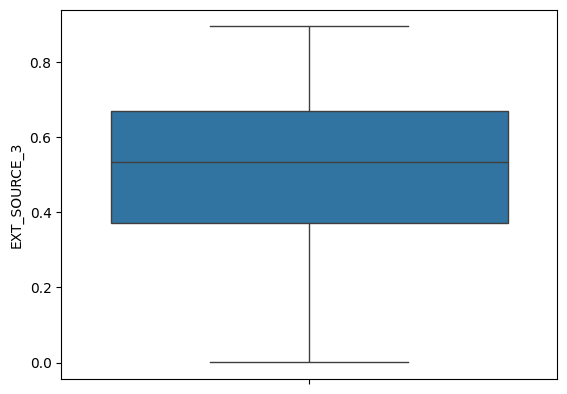

In [23]:
sns.boxplot(application_data["EXT_SOURCE_3"])
plt.show()

As per the plot there is no outlier for this column

In [24]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

Mean = 0.510 and median = 0.535 which is not that much difference. If we will see the 25% and 75%, that also differed equally. We can impute the mean value of this column and also its a floating point column data type.

In [25]:
EXT_SOURCE_3_mean = application_data['EXT_SOURCE_3'].mean()
EXT_SOURCE_3_mean

np.float64(0.5108529061799658)

In [26]:
application_data['EXT_SOURCE_3'] = application_data['EXT_SOURCE_3'].fillna(EXT_SOURCE_3_mean)

In [27]:
application_data['EXT_SOURCE_3'].isnull().sum()

np.int64(0)

Let's take column EXT_SOURCE_2 which is having 0.214626% of missing Value.

In [28]:
print(application_data['EXT_SOURCE_2'].isnull().mean(),'\n')
print(application_data['EXT_SOURCE_2'].describe())

0.0021462646864665006 

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


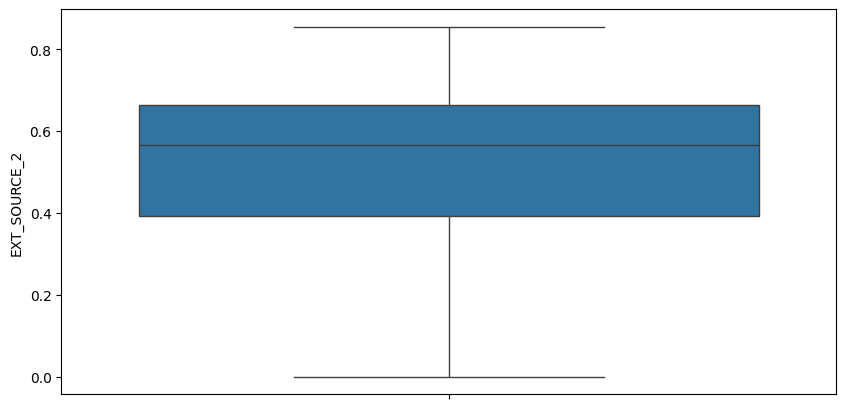

In [29]:
plt.figure(figsize = (10,5))
sns.boxplot(application_data["EXT_SOURCE_2"])
plt.show()

In [30]:
EXT_SOURCE_2_mean = application_data['EXT_SOURCE_2'].mean()
EXT_SOURCE_2_mean

np.float64(0.5143926741308462)

In [32]:
application_data['EXT_SOURCE_2'] = application_data['EXT_SOURCE_2'].fillna(EXT_SOURCE_2_mean)

In [33]:
application_data['EXT_SOURCE_2'].isnull().sum()

np.int64(0)

hecking Column OCCUPATION_TYPE

In [34]:
application_data.OCCUPATION_TYPE.isnull().mean()*100

np.float64(31.345545362604916)

In [35]:
print(application_data.OCCUPATION_TYPE.value_counts(),'\n')

print(application_data.OCCUPATION_TYPE.mode()[0])

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64 

Laborers


In [36]:
application_data.OCCUPATION_TYPE.isnull().sum()

np.int64(96391)

We can see that the mode of this column is coming as "Laborers" but you can see there that the null values are more than the "Laborers" count. So, let's keep the null value as it is

Checking Column AMT_GOODS_PRICE

In [37]:
application_data.AMT_GOODS_PRICE.isnull().mean()*100

np.float64(0.09040327012692229)

In [38]:
print(application_data['AMT_GOODS_PRICE'].describe(),'\n')
print(application_data['AMT_GOODS_PRICE'].describe().apply(lambda p: '%.2f' % p))

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64 

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object


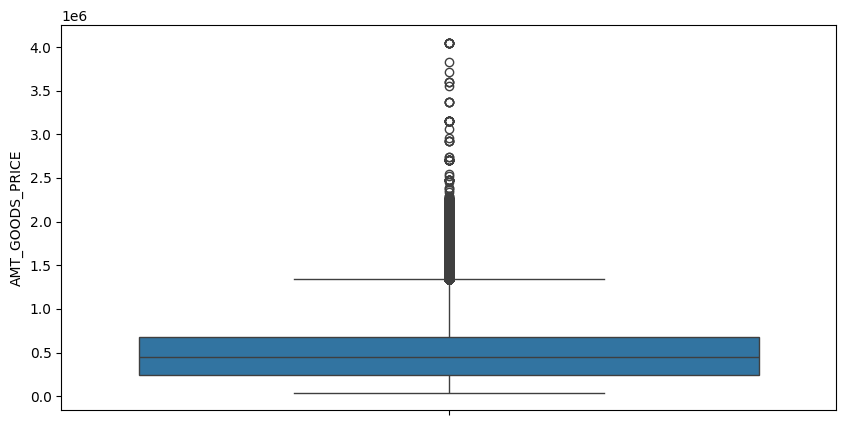

In [39]:
plt.figure(figsize = (10,5))
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

As we can see there are some points above the upper bound those are outliers. We need to handle the outliers properly.

1. Standard deviation of AMT_GOODS_PRICE is very high.
2. Also there are good amount of outliers in the colum as well.
3. So, imputing missing values with mean or median will be biased in this case.
4. Hence, it is better to remove the rows with missing AMT_GOODS_PRICE. Infact these rows are only 0.09% of the whole records.

In [40]:
#Lets remove those 0.09 % of total rows for that columns.
application_data = application_data[~np.isnan(application_data['AMT_GOODS_PRICE'])]

# We can do this with drop method as well. 

Checking Column AMT_REQ_CREDIT_BUREAU_QRT

In [41]:
print(application_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().mean()*100, '\n')

print(application_data.AMT_REQ_CREDIT_BUREAU_QRT.describe())

13.498875446322497 

count    265760.000000
mean          0.265525
std           0.794239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [42]:
print(application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts())

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64


As we can see this variable is a int type data type. And most widely used number is 0.0. Since they all are the no of credit enqueries, replacing the missing value with the most of the used value would be better option. So, we will take the mode of for this column.

In [43]:
mode_data_AMT_REQ_CREDIT_BUREAU_QRT = application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
mode_data_AMT_REQ_CREDIT_BUREAU_QRT

np.float64(0.0)

In [44]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT = application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_QRT)

In [45]:
application_data.isnull().mean() *100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003906
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.355356
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_W

In [46]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,
# AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
print(application_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_HOUR = application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_HOUR = application_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_HOUR)

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264135
1.0      1559
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64 



In [47]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().mean() *100 

np.float64(0.0)

In [48]:
print(application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_DAY = application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_DAY = application_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_DAY )

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264271
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64 



In [49]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().mean()*100

np.float64(0.0)

In [50]:
print(application_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_WEEK = application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_WEEK = application_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_WEEK )

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257228
1.0      8204
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64 



In [51]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().mean()*100

np.float64(0.0)

In [52]:
print(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_YEAR= application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_YEAR = application_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_YEAR)

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71733
1.0     63338
2.0     50143
3.0     33606
4.0     20702
5.0     12048
6.0      6961
7.0      3866
8.0      2126
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64 



In [53]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().mean()*100

np.float64(0.0)

In [54]:
print(application_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts(),'\n')
mode_data_AMT_REQ_CREDIT_BUREAU_MON= application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_MON = application_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_MON )

AMT_REQ_CREDIT_BUREAU_MON
0.0     222022
1.0      33128
2.0       5385
3.0       1991
4.0       1076
5.0        602
6.0        342
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64 



In [55]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().mean()

np.float64(0.0)

In [56]:
(application_data.isnull().mean()*100).sort_values(ascending = False).apply(lambda p: '%.2f' % p)

OCCUPATION_TYPE                31.36
AMT_ANNUITY                     0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
SK_ID_CURR                      0.00
TARGET                          0.00
FLAG_OWN_REALTY                 0.00
FLAG_OWN_CAR                    0.00
AMT_INCOME_TOTAL                0.00
CNT_CHILDREN                    0.00
AMT_GOODS_PRICE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
AMT_CREDIT                      0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
E

As we can see all the Null values are imputed except the OCCUPATION_TYPE and i have already explained in the above cell that we can't put the mode value of this column in the missing rows as the "Labour" counts are really less than the no of missing values.

Handling Errors in Columns

In [57]:
Days_columns = application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']]
Days_columns.head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH
0       -9461           -637            -2120
1      -16765          -1188             -291
2      -19046           -225            -2531
3      -19005          -3039            -2437
4      -19932          -3038            -3458

In the cells shown above 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH' which are having negative or mixed values, we need to work on thse variables.

Days values can't be negative values. We have to convert them to absoulte values.

In [58]:
application_data.DAYS_BIRTH = application_data.DAYS_BIRTH.abs()

In [59]:
application_data.DAYS_BIRTH 

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307233, dtype: int64

In [60]:
application_data.DAYS_EMPLOYED = application_data.DAYS_EMPLOYED.abs()
print(application_data.DAYS_EMPLOYED)

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307233, dtype: int64


In [61]:
application_data.DAYS_ID_PUBLISH = application_data.DAYS_ID_PUBLISH.abs()
print(application_data.DAYS_ID_PUBLISH)

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307233, dtype: int64


In [62]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0        9461            637             2120        Laborers   
1       16765           1188              291      Core staff   
2       19046            225             2531        Laborers   
3       19005           3039             2437        Laborers   
4       19932           3038             3458      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0  Business Entity Type 3      0.262949      0.139376                0   
1                  School      0.622246      0.510853                0   
2              Government      0.555912      0.729567                0   
3  Business Entity Type 3      0.650442      0.510853                0   
4                Religion      0.322738      0.510853                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0      

As we can see that 'DAYS_BIRTH' is in Days. to convert that to years we need to divide each rows values of this column by 365.

In [63]:
application_data['Age'] = round(application_data.DAYS_BIRTH/365).astype('int')
print(application_data.Age)

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: Age, Length: 307233, dtype: int64


In [64]:
#We can drop the "DAYS_BIRTH" column now as we already handle that column as 'Age' column now.
application_data.drop(['DAYS_BIRTH'], axis = 1, inplace = True)

In [65]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            637             2120        Laborers              1.0   
1           1188              291      Core staff              2.0   
2            225             2531        Laborers              1.0   
3           3039             2437        Laborers              2.0   
4           3038             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0  Business Entity Type 3      0.262949      0.139376                0   
1                  School      0.622246      0.510853                0   
2              Government      0.555912      0.729567                0   
3  Business Entity Type 3      0.650442      0.510853                0   
4                Religion      0.322738      0.510853                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0    

Handling Outliers:
1. 'AMT_INCOME_TOTAL'
2. 'AMT_CREDIT'
3. 'AMT_ANNUITY'
4. 'AMT_GOODS_PRICE'
5. 'AGE'

<function matplotlib.pyplot.show(close=None, block=None)>

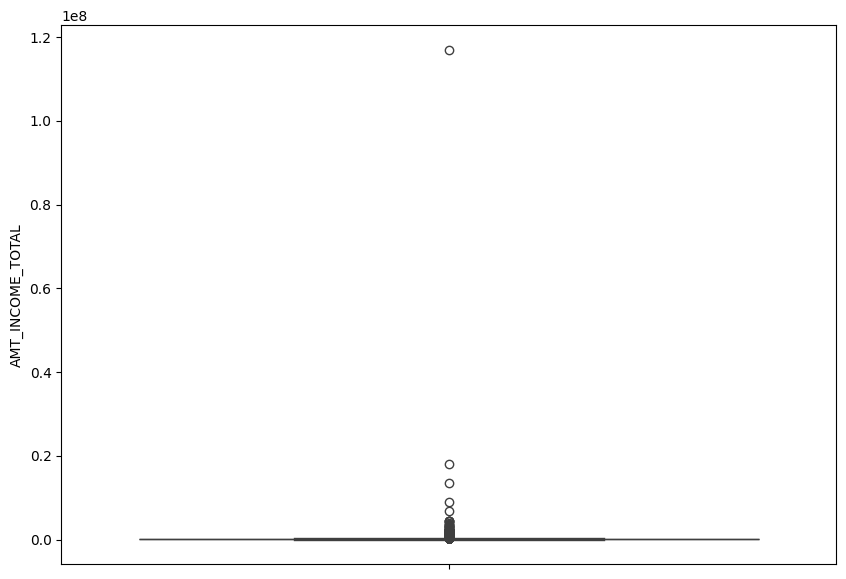

In [66]:
plt.figure(figsize = (10,7))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show

In [67]:
q1=application_data["AMT_INCOME_TOTAL"].describe()["25%"]
q3=application_data["AMT_INCOME_TOTAL"].describe()["75%"]
iqr=q3-q1 #interquartile range
# lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
application_data["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]>upper_bound,upper_bound,application_data["AMT_INCOME_TOTAL"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

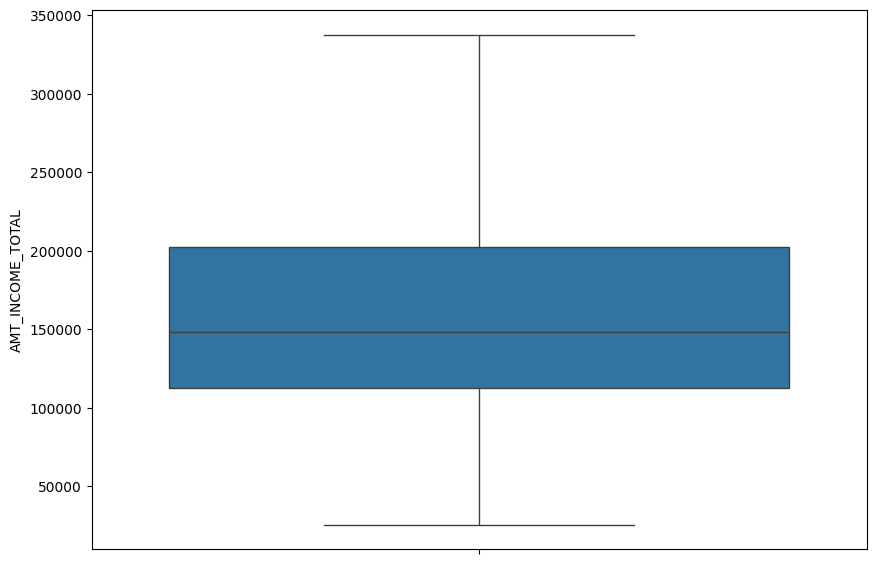

In [68]:
plt.figure(figsize = (10,7))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

We can see now that the outliers are gone for the column AMT_INCOME_TOTAL

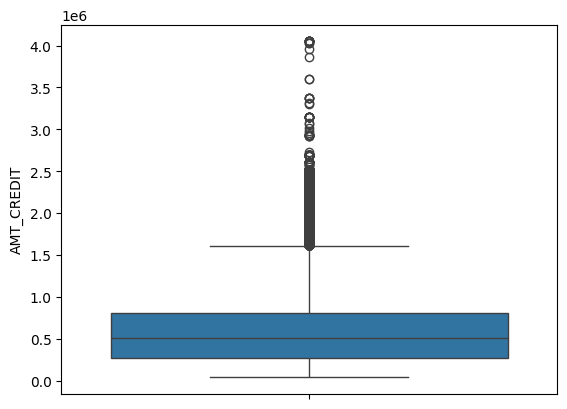

In [69]:
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

In [70]:
q1=application_data["AMT_CREDIT"].describe()["25%"]
q3=application_data["AMT_CREDIT"].describe()["75%"]
iqr=q3-q1 #interquartile range
# lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
application_data["AMT_CREDIT"]=np.where(application_data["AMT_CREDIT"]>upper_bound,upper_bound,application_data["AMT_CREDIT"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

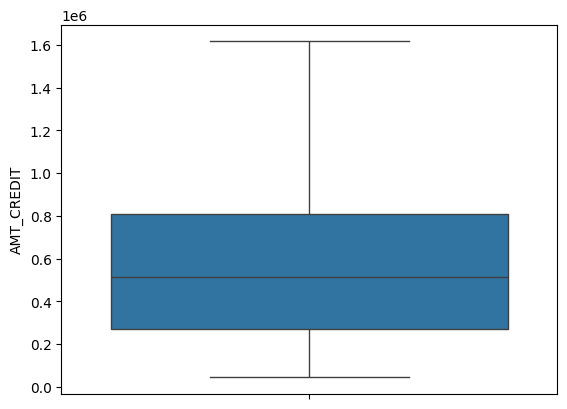

In [71]:
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

After the adjustment now the upper bound outlier is gone for AMT_CREDIT column.

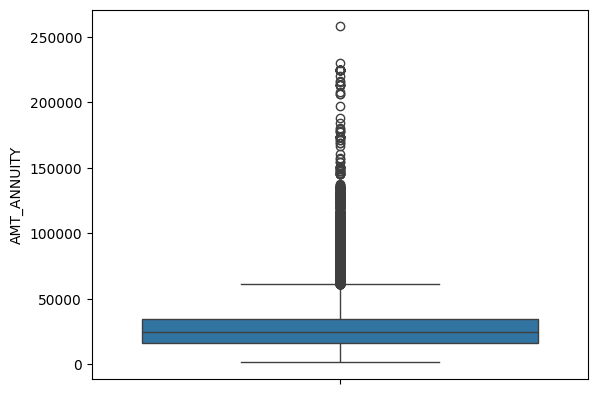

In [72]:
# AMT_ANNUITY'
# 'AMT_GOODS_PRICE'
# 'AGE'
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

There no outlier here. No need for adjustment for this column

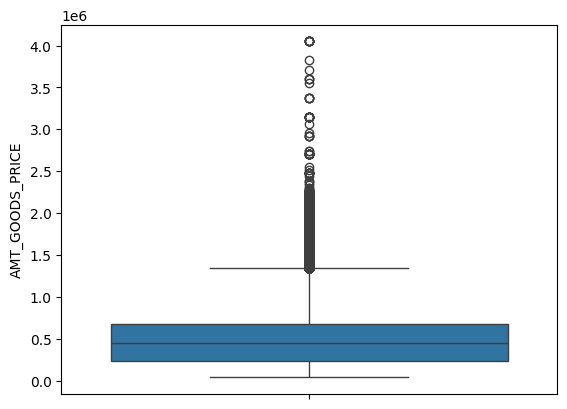

In [73]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

In [74]:
#Upper bound outliers are there. Need to work on those values.

q1=application_data["AMT_GOODS_PRICE"].describe()["25%"]
q3=application_data["AMT_GOODS_PRICE"].describe()["75%"]
iqr=q3-q1 #interquartile range
# lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
application_data["AMT_GOODS_PRICE"]=np.where(application_data["AMT_GOODS_PRICE"]>upper_bound,upper_bound,application_data["AMT_GOODS_PRICE"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

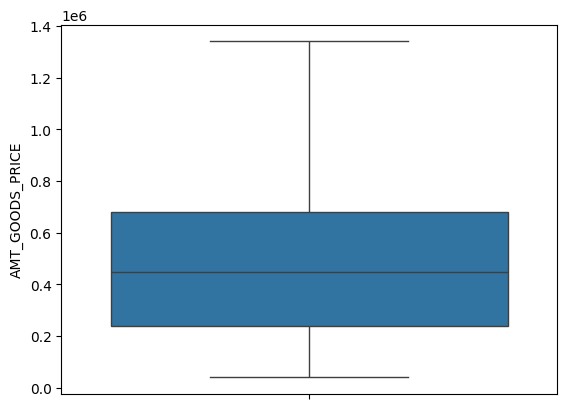

In [75]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

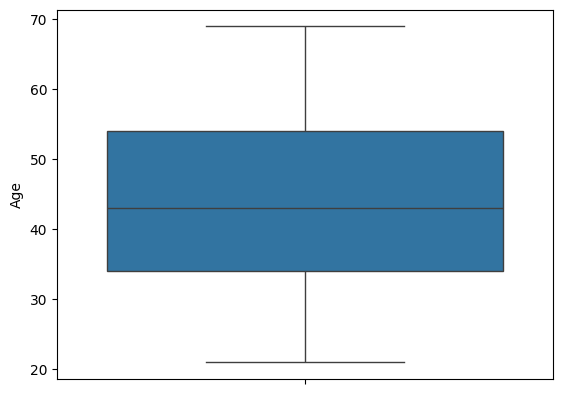

In [76]:
sns.boxplot(application_data.Age)
plt.show()

Now outliers is managed and adjusted for the columns i had mentioned initially.

In [77]:
application_data.CODE_GENDER.value_counts()

CODE_GENDER
F      202259
M      104970
XNA         4
Name: count, dtype: int64

In [78]:
application_data.CODE_GENDER = application_data.CODE_GENDER.replace('XNA','F')

In [79]:
application_data.CODE_GENDER.value_counts()

CODE_GENDER
F    202263
M    104970
Name: count, dtype: int64

In CODE_GENDER column there are some XNA value, i just replced the XNA with F because as i checked the no of females are way higher than the male.

Data Imbalance Checking

We can check the imbalance by using plotting method. I will use bar plots here to distinguise the values of the wanted variables/columns.

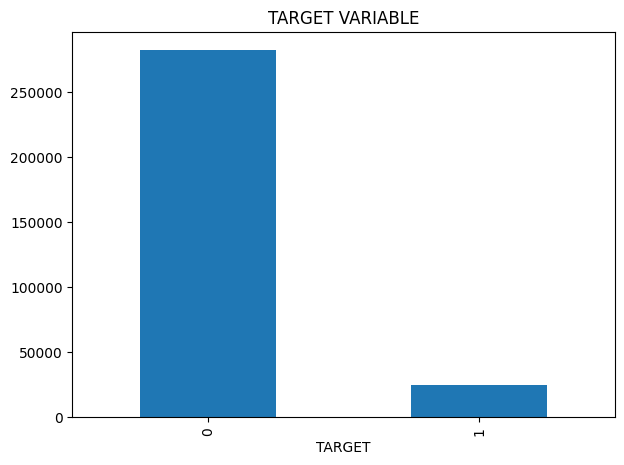

In [80]:
#Target variable
plt.figure(figsize=(7,5))
application_data.TARGET.value_counts().plot(kind = 'bar')
plt.title('TARGET VARIABLE')
plt.show()

In [81]:
print(application_data.TARGET.value_counts(normalize=True)*100)

TARGET
0    91.926649
1     8.073351
Name: proportion, dtype: float64


As we know from the data dictionary, 1 mean defaulters and 0 mean not. Here, some defaulters are there. But the no of defaulter are very less compare to the non defaulters. Only 8.07% are Defaulters out of 100.

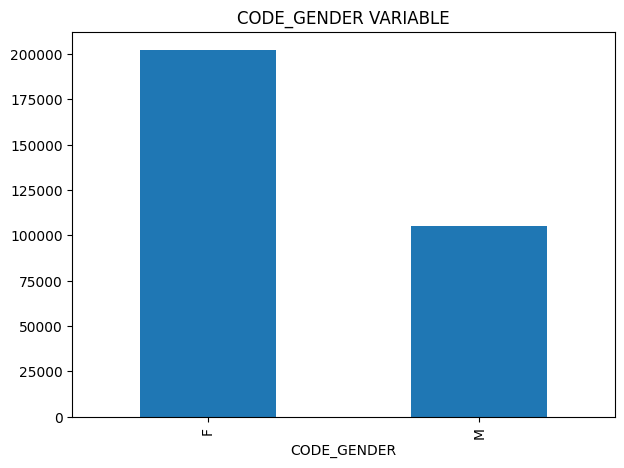

In [82]:
#CODE_GENDER variable
plt.figure(figsize=(7,5))
application_data.CODE_GENDER.value_counts().plot(kind = 'bar')
plt.title('CODE_GENDER VARIABLE')
plt.show()

In [83]:
print(application_data.CODE_GENDER.value_counts(normalize = True)*100)

CODE_GENDER
F    65.833748
M    34.166252
Name: proportion, dtype: float64


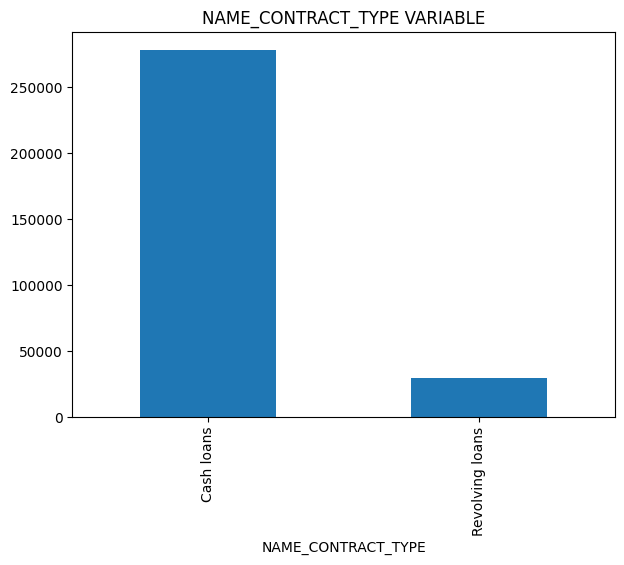

In [84]:
#NAME_CONTRACT_TYPE variable
plt.figure(figsize=(7,5))
application_data.NAME_CONTRACT_TYPE.value_counts().plot(kind = 'bar')
plt.title('NAME_CONTRACT_TYPE VARIABLE')
plt.show()

In [85]:
print(application_data.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100)

NAME_CONTRACT_TYPE
Cash loans         90.560584
Revolving loans     9.439416
Name: proportion, dtype: float64


There are more cash loans than the Revolving Loans.

NAME_INCOME_TYPE
Working                 51.618478
Commercial associate    23.295024
Pensioner               18.012063
State servant            7.056534
Unemployed               0.007161
Student                  0.005859
Businessman              0.003255
Maternity leave          0.001627
Name: proportion, dtype: float64 

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018087
Higher education                 24.345692
Incomplete higher                 3.341763
Lower secondary                   1.241078
Academic degree                   0.053380
Name: proportion, dtype: float64 

NAME_FAMILY_STATUS
Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.231860
Name: proportion, dtype: float64 

NAME_FAMILY_STATUS
Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.

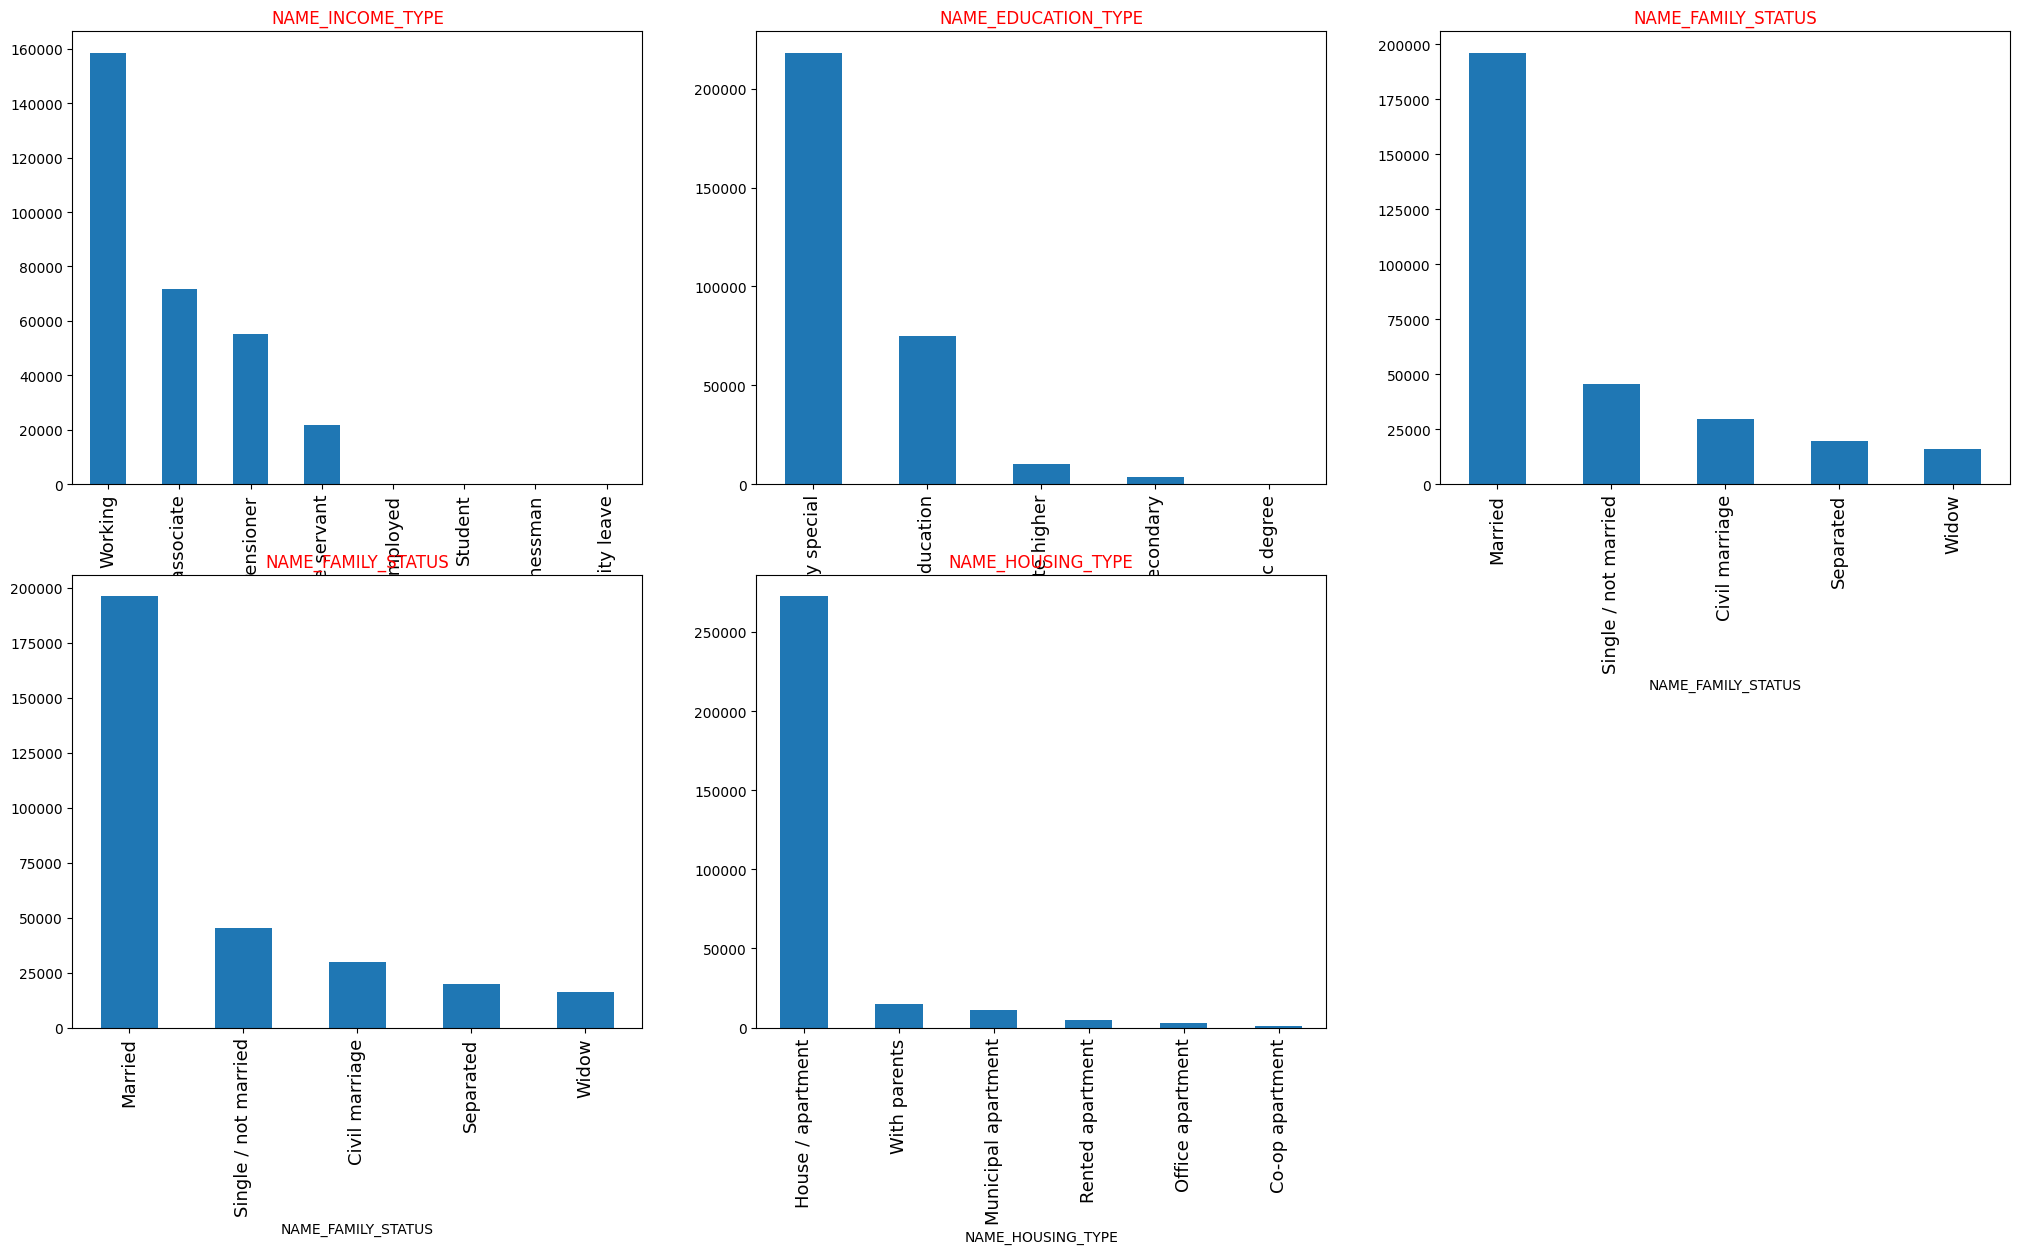

In [86]:
# We can try the list and loop method as well. 

variable_list = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
x = 0
plt.figure(figsize = (25,20))
for variable in variable_list:
    x += 1
    plt.subplot(3,3,x)
    plt.title(variable, color = 'red')
    application_data[variable].value_counts().plot(kind = 'bar')
    print(application_data[variable].value_counts(normalize=True)*100,"\n")
    plt.xticks(rotation= 90, fontsize = 13)

1. NAME_INCOME_TYPE: Working, Commercial associate and Pensioner are the one with higher percentage of applicants.
2. NAME_EDUCATION_TYPE: Most of the loan provided to Secondary or for Higher education purposes.
3. NAME_FAMILY_STATUS: Most of the loan applicants are Married.
4. NAME_HOUSING_TYPE: The applicants are staying mostly in their own house else in apratments.

Graphical Analysis

In [87]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG

In [88]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307233 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13  NAME

There are still alot of columns present, lets see the FALG_DOCUMENT columns and anlyse them properly

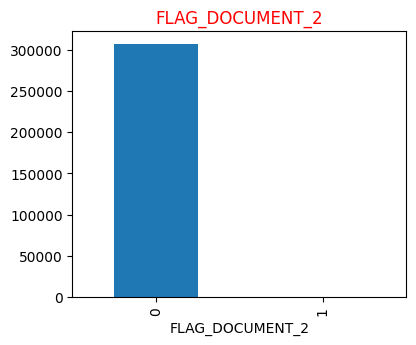

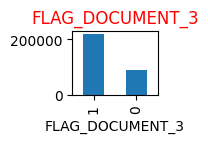

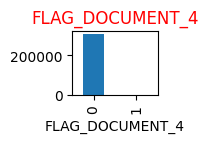

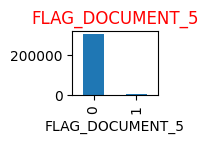

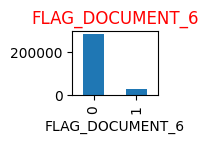

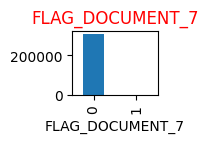

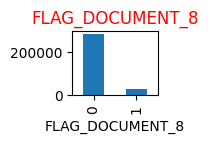

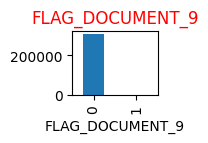

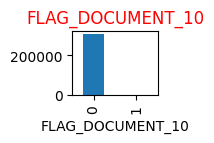

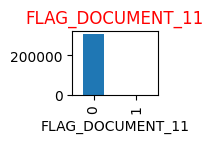

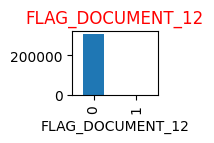

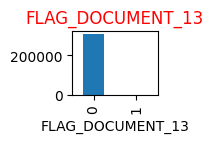

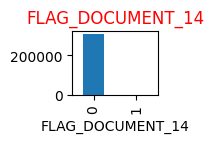

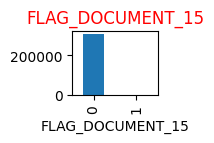

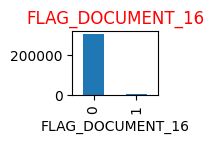

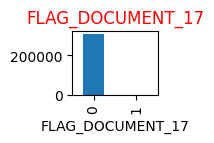

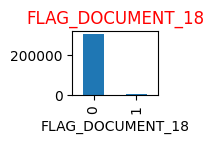

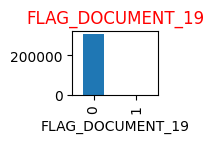

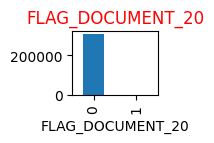

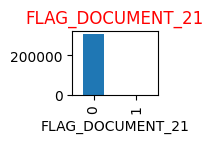

In [89]:
flag_list = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
plt.figure(figsize=(25,20))
x =1
for flag in flag_list:
    x += 1 
    plt.subplot(5,5,x)
    application_data[flag].value_counts().plot(kind = 'bar')
    plt.title(flag, color='red')
    plt.show()

Most of the flags document are having values 0 more means those documents are submitted. Only in flag_document-3,6 and 8 little bit more but we dont need to worry about these columns. As every documents seems submitted perfectly. So, we can drop these columns now except flag-3 and flag -6 and flag-8

In [90]:
application_data.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], inplace = True, axis = 1)

In [91]:
application_data.shape

(307233, 37)

After dropping those Falg columns, the columns reduced to 37 now.

In [92]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307233 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13  NAME

In [93]:
categorical_data_cols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS']
print(len(categorical_data_cols))
continious_data_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','Age']
print(len(continious_data_cols))

12
8


I am taking this many variables as i can extract some details from these columns.I don't need to add Flag columns as those are document columns.

Univariate Analysis

Categorical Univariate Analysis:
CODE_GENDER

CODE_GENDER
F    202263
M    104970
Name: count, dtype: int64


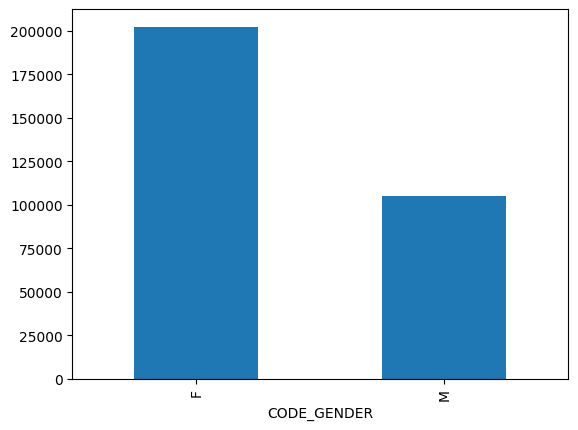

In [94]:
print(application_data.CODE_GENDER.value_counts())

application_data.CODE_GENDER.value_counts().plot.bar()
plt.show()

No. of females are more than males

The list of defaulters who are now unable to pay their loan bill

In [95]:
target_value_1 = application_data[(application_data.TARGET == 1)]
target_value_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             637             2120        Laborers              1.0   
26           2628             1827   Cooking staff              1.0   
40           1262             1029        Laborers              2.0   
42           3597             4409     Sales staff              2.0   
81         365243             4199             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

         ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_3  \
0   Business Entity Type 3      0.262949      0.139376                1   
26  Business Entity Type 3      0.548477      0.190706                1   
40  Business Entity Type 3      0.306841      0.320163                1   
42           Self-employed      0.674203      0.399676                1   
81                     XNA      0.023952      0.720944                0   

    FLAG_DOCUMENT_6  FLAG_DOCUMENT_8  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                0                         0.0   
26                0                0                         0.0   
40                0                0                         0.0   
42                0                0                         0.0   
81                1                0                         0.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                         0.0                         0.0   
26                        0.0                         0.0   
40            

List of Non-Defaulters who are paying their loan bills

In [96]:
target_value_0 = application_data[(application_data.TARGET == 0)]
target_value_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1           1188              291      Core staff              2.0   
2            225             2531        Laborers              1.0   
3           3039             2437        Laborers              2.0   
4           3038             3458      Core staff              1.0   
5           1588              477        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_3  \
1                  School      0.622246      0.510853                1   
2              Government      0.555912      0.729567                0   
3  Business Entity Type 3      0.650442      0.510853                1   
4                Religion      0.322738      0.510853                0   
5                   Other      0.354225      0.621226                1   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_8  AMT_REQ_CREDIT_BUREAU_HOUR  \
1                0                0                         0.0   
2                0                0                         0.0   
3                0                0                         0.0   
4                0                1                         0.0   
5                0                0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0            

Now let's see who are paying their loan bill correctly. Between men and women which gender is having good ratio of paying or defaulters

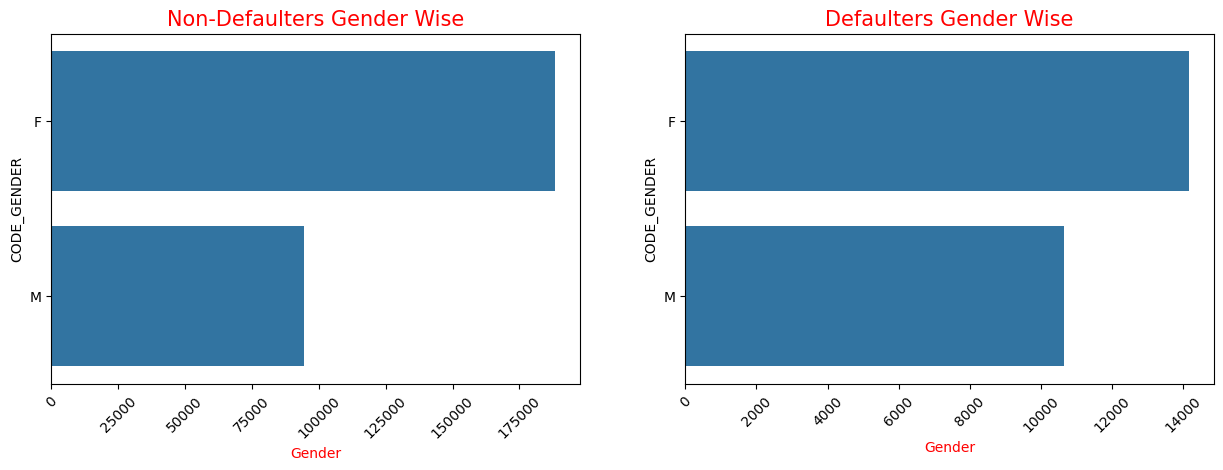

In [97]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.CODE_GENDER,order=target_value_0.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Gender Wise",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.CODE_GENDER,order=target_value_1.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'red', loc = 'center' )
plt.title("Defaulters Gender Wise", color ='red', fontsize = 15)
plt.show()
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.show()

Summary:

1. Its clearly visible now that the more no. of females are paying their bills correctly compare to males.
2. Same goes for Defaulters as well. Females nos are more than male here.

FLAG_OWN_CAR

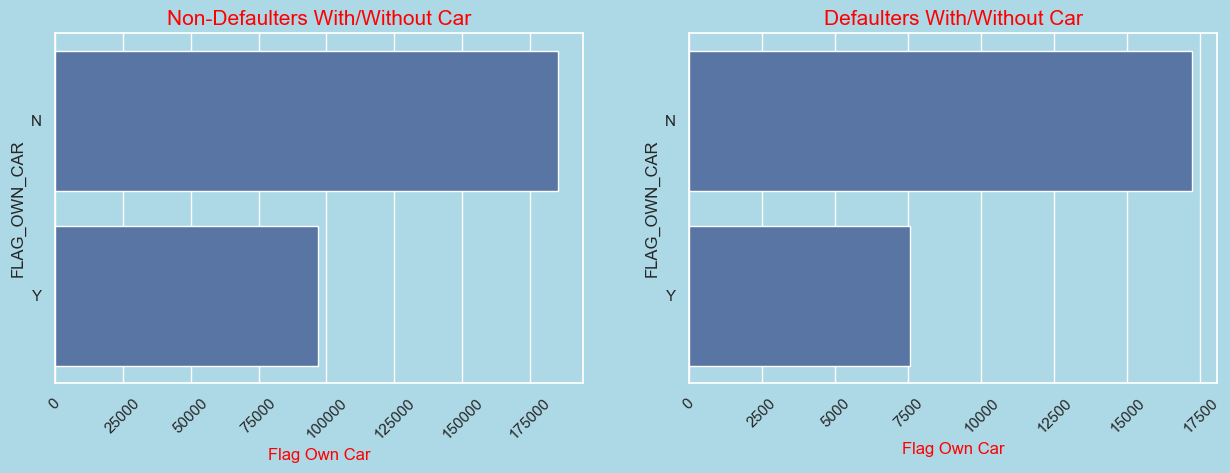

In [98]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.FLAG_OWN_CAR,order=target_value_0.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Flag Own Car', color = 'red', loc = 'center' )
plt.title("Non-Defaulters With/Without Car",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.FLAG_OWN_CAR,order=target_value_1.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Flag Own Car', color = 'red', loc = 'center' )
plt.title("Defaulters With/Without Car", color ='red', fontsize = 15)
plt.show()

Summary:

1. Maximum no. of Non-defaulters are not having their own car.
2. Maximum Defaulters also not having their own car.

FLAG_OWN_REALTY

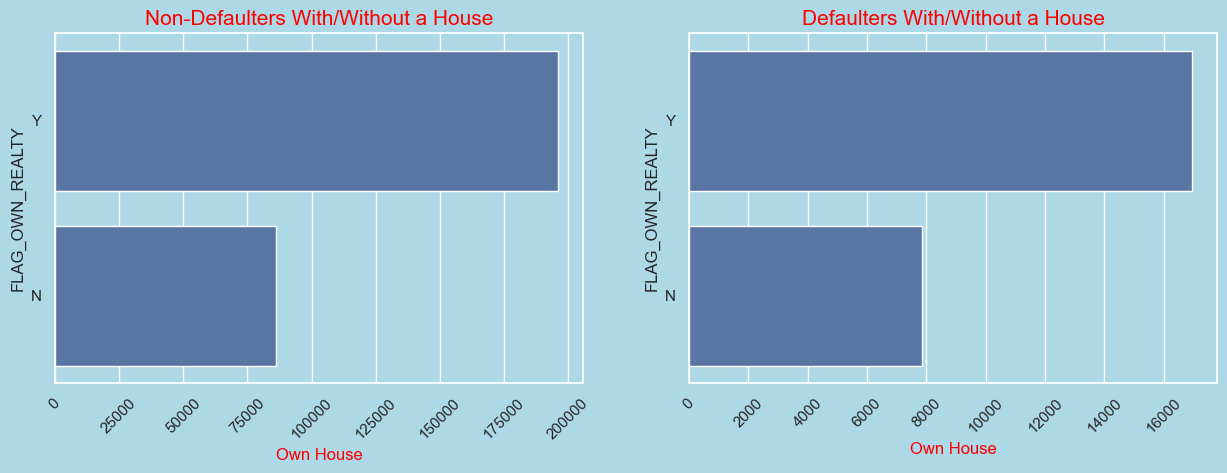

In [99]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.FLAG_OWN_REALTY,order=target_value_0.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Own House', color = 'red', loc = 'center' )
plt.title("Non-Defaulters With/Without a House",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.FLAG_OWN_REALTY,order=target_value_1.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Own House', color = 'red', loc = 'center' )
plt.title("Defaulters With/Without a House", color ='red', fontsize = 15)
plt.show()

Summary:

Most of the Non Defaulter and Defaulters are having their own house/Falt.

NAME_CONTRACT_TYPE

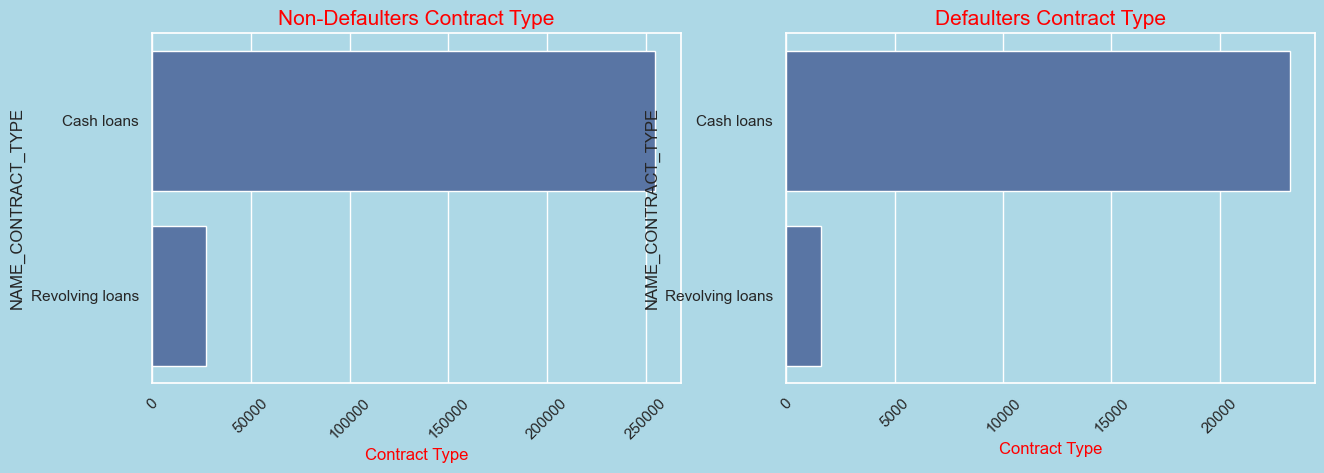

In [100]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_CONTRACT_TYPE,order=target_value_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Contract Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Contract Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_CONTRACT_TYPE,order=target_value_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Contract Type', color = 'red', loc = 'center' )
plt.title("Defaulters Contract Type", color ='red', fontsize = 15)
plt.show()

Summary:

Nearly all opt for the cash loans contract type by both defaulter and non-defaulters.

NAME_INCOME_TYPE

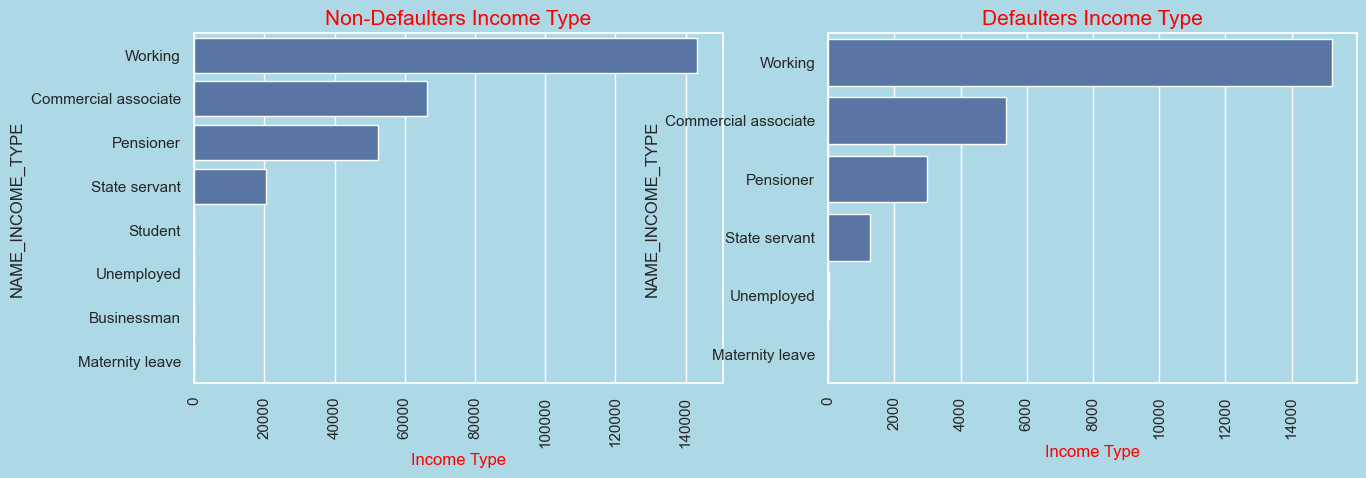

In [101]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_INCOME_TYPE,order=target_value_0.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Income Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Income Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_INCOME_TYPE,order=target_value_1.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Income Type', color = 'red', loc = 'center' )
plt.title("Defaulters Income Type", color ='red', fontsize = 15)
plt.show()

In [102]:
print(application_data.NAME_INCOME_TYPE.value_counts())


NAME_INCOME_TYPE
Working                 158589
Commercial associate     71570
Pensioner                55339
State servant            21680
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


Summary:

The Defaulters are mostly working professionals following by commercial Associates.

NAME_EDUCATION_TYPE

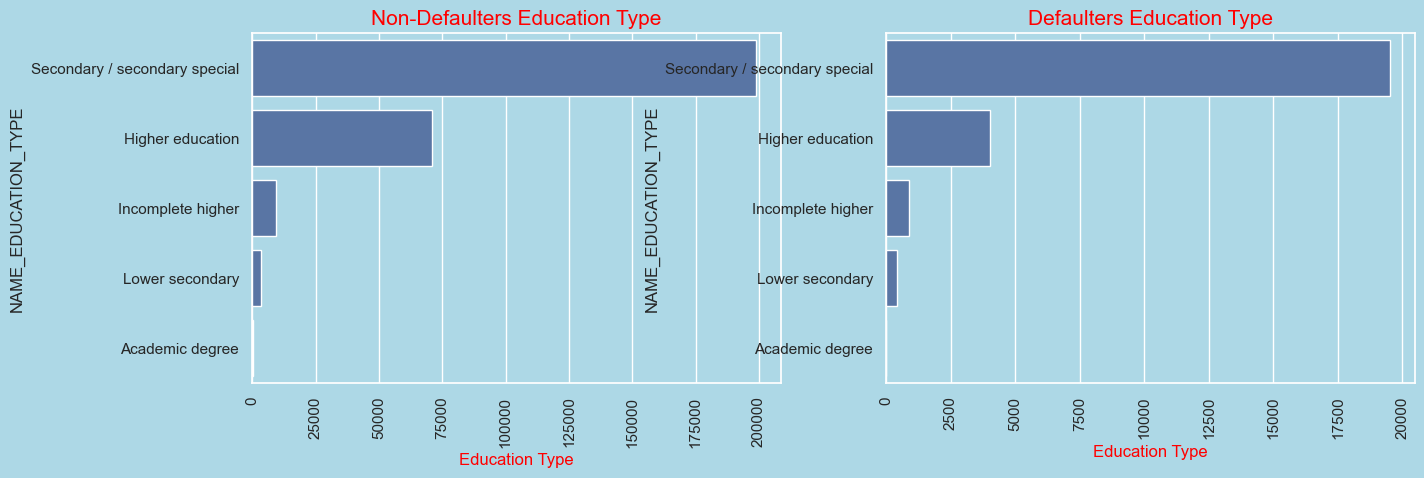

In [103]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_EDUCATION_TYPE,order=target_value_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Education Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Education Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_EDUCATION_TYPE,order=target_value_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Education Type', color = 'red', loc = 'center' )
plt.title("Defaulters Education Type", color ='red', fontsize = 15)
plt.show()

Summary:

The defaulter are mostly having Secondary/Secondary special kind of education.

NAME_FAMILY_STATUS

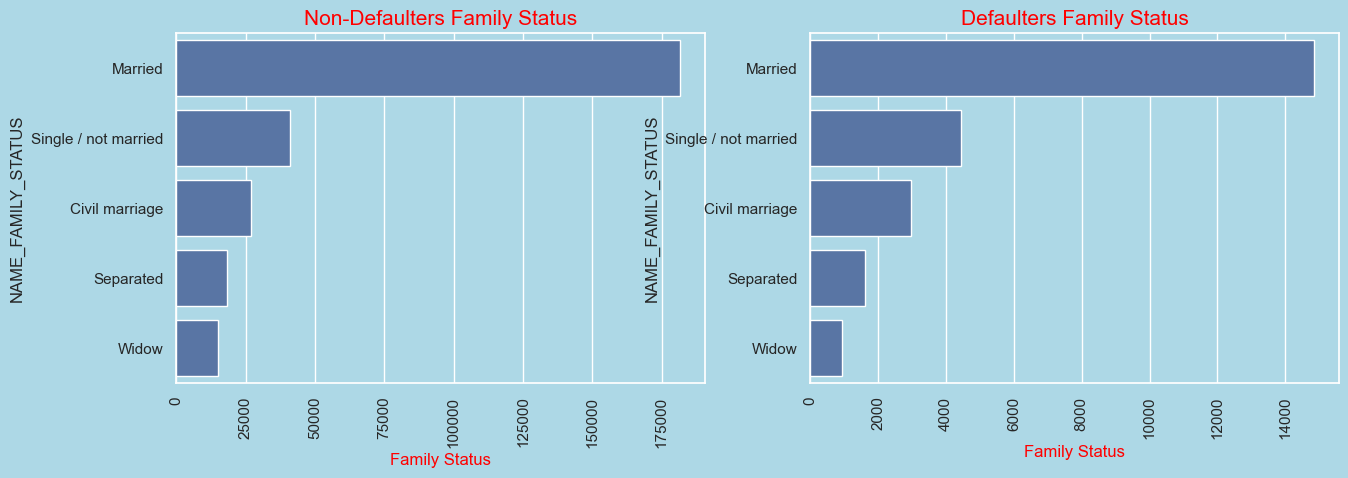

In [104]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_FAMILY_STATUS,order=target_value_0.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Family Status', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Family Status",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_FAMILY_STATUS,order=target_value_1.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Family Status', color = 'red', loc = 'center' )
plt.title("Defaulters Family Status", color ='red', fontsize = 15)
plt.show()

Summary:

Married people are mostly defaulters. There is less no. of Single/Not Married people who are defaulters.

NAME_HOUSING_TYPE

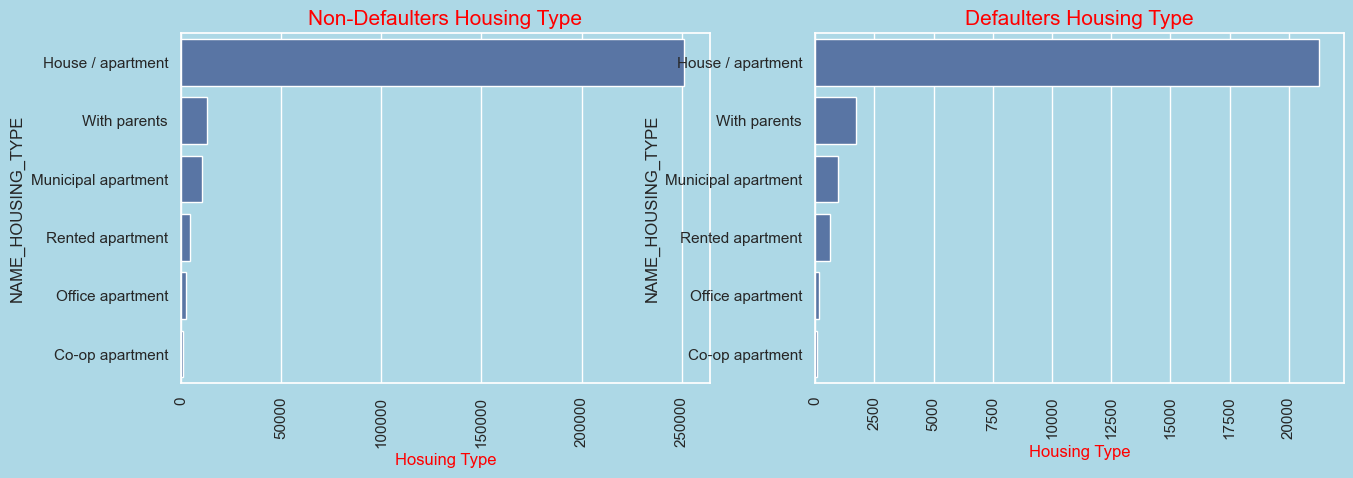

In [105]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_HOUSING_TYPE,order=target_value_0.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Hosuing Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Housing Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_HOUSING_TYPE,order=target_value_1.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Housing Type', color = 'red', loc = 'center' )
plt.title("Defaulters Housing Type", color ='red', fontsize = 15)
plt.show()

Summary:

Most of the Defaulters are having their own house/apartment.

ORGANIZATION_TYPE

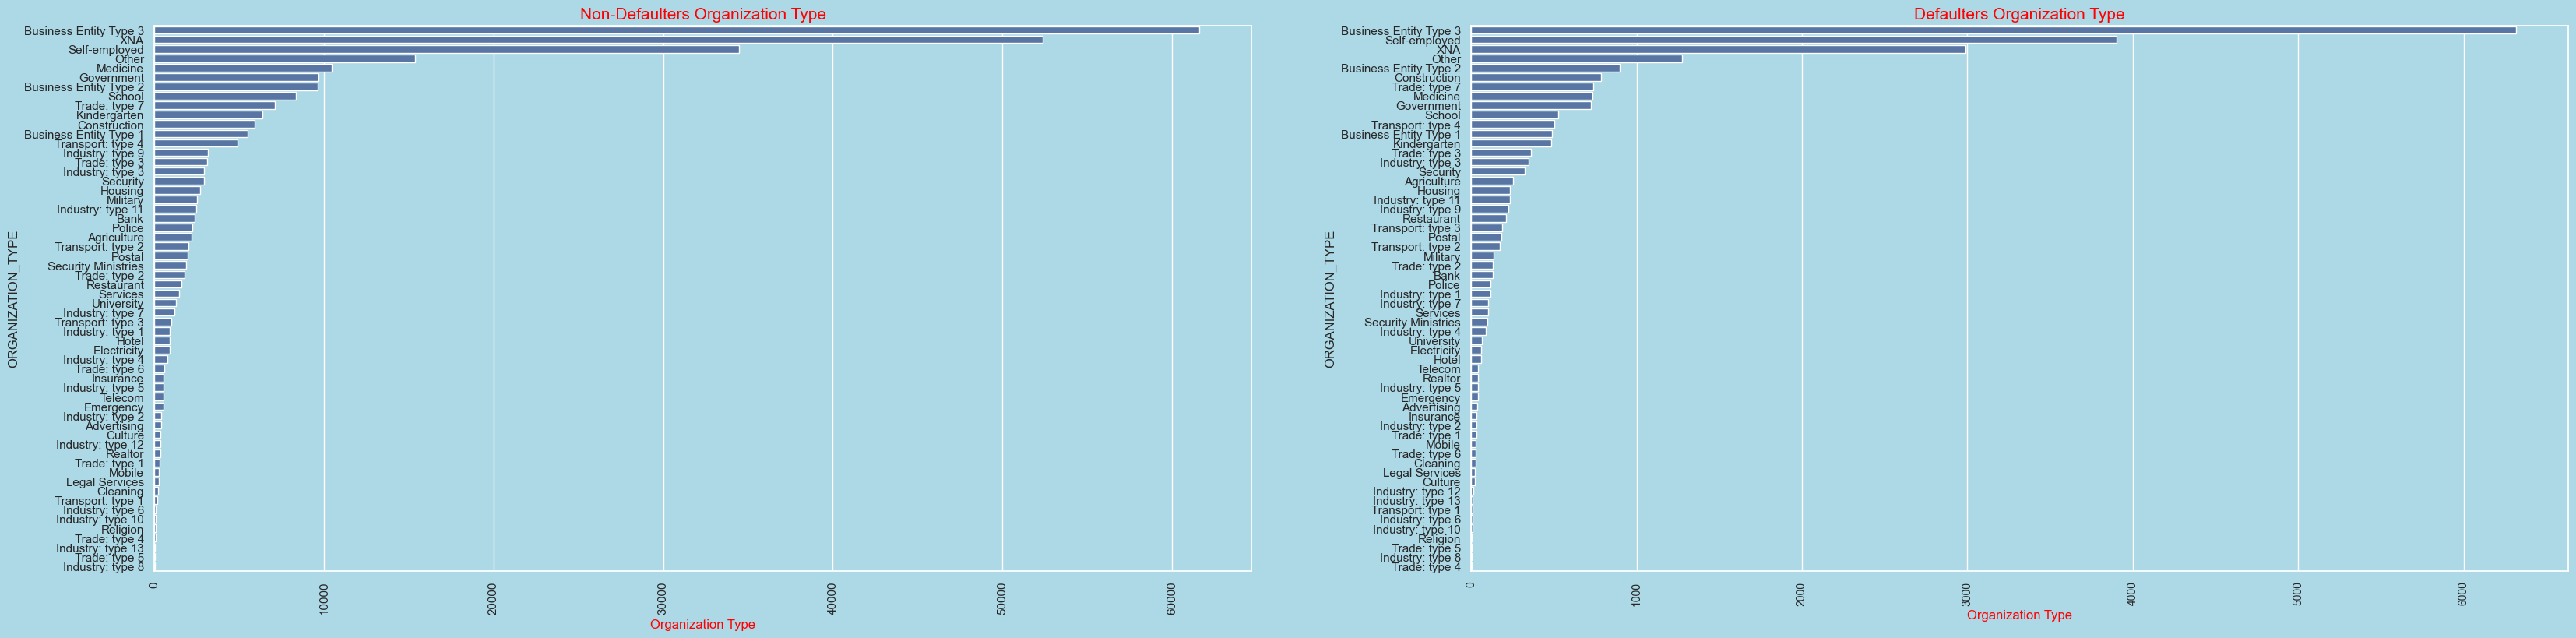

In [108]:
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
sns.countplot(target_value_0.ORGANIZATION_TYPE,order=target_value_0.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Organization Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Organization Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.ORGANIZATION_TYPE,order=target_value_1.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90, fontsize = 10)
plt.xlabel(xlabel = 'Organization Type', color = 'red', loc = 'center' )
plt.title("Defaulters Organization Type", color ='red', fontsize = 15)
plt.show()

In [107]:
(application_data.ORGANIZATION_TYPE == 'XNA').mean()*100

np.float64(18.01629382260369)

Summary:

Most of the Defaulters are working as Business Entry Type 3.

OCCUPATION_TYPE

In [109]:
application_data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55134
Sales staff              32064
Core staff               27531
Managers                 21348
Drivers                  18590
High skill tech staff    11371
Accountants               9802
Medicine staff            8528
Security staff            6713
Cooking staff             5940
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   525
Name: count, dtype: int64

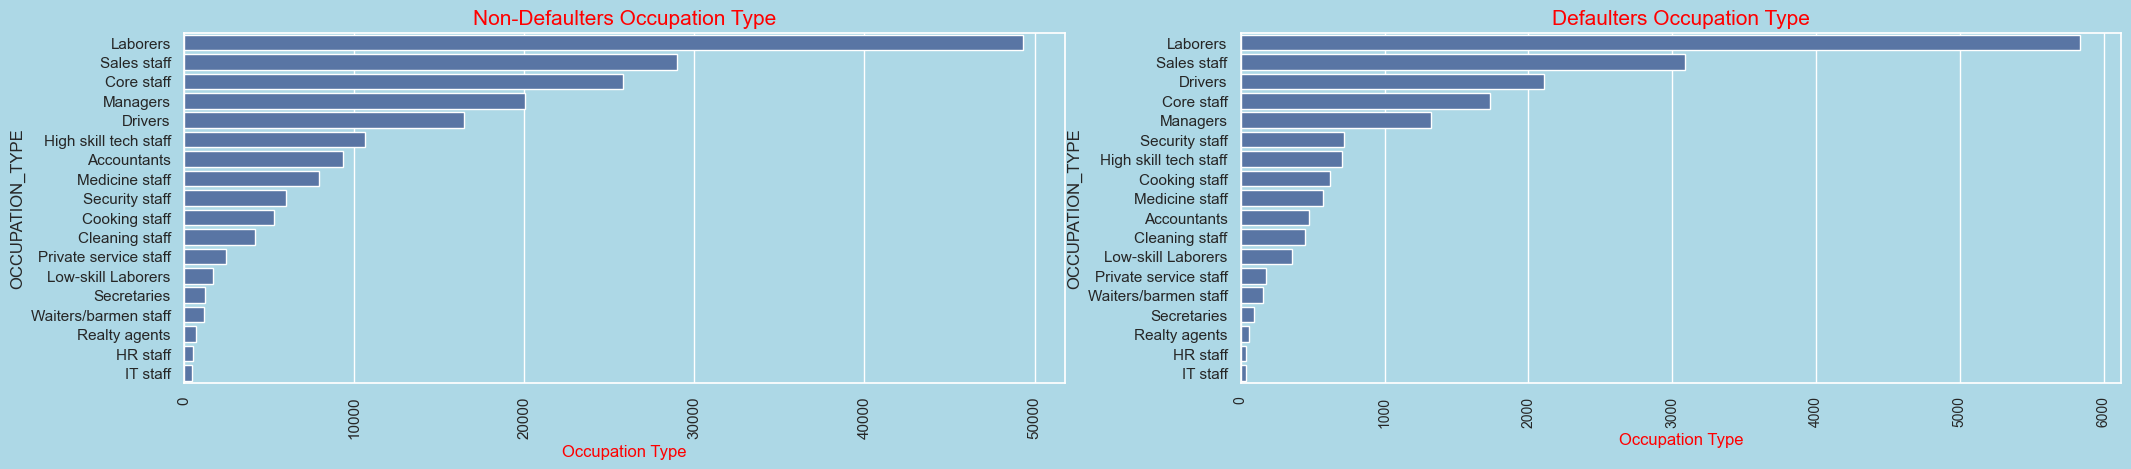

In [110]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.OCCUPATION_TYPE,order=target_value_0.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Occupation Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Occupation Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.OCCUPATION_TYPE,order=target_value_1.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90, fontsize = 10)
plt.xlabel(xlabel = 'Occupation Type', color = 'red', loc = 'center' )
plt.title("Defaulters Occupation Type", color ='red', fontsize = 15)
plt.show()

Summary:

Most of the defaulters are labours by their occupation. The labours are the one who is lower skilled people so, they are struggling with the loan bill payment and becoming defaulters.

Univariate Analysis for Continious Variable

In [111]:
continious_data_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'Age']

AMT_INCOME_TOTAL

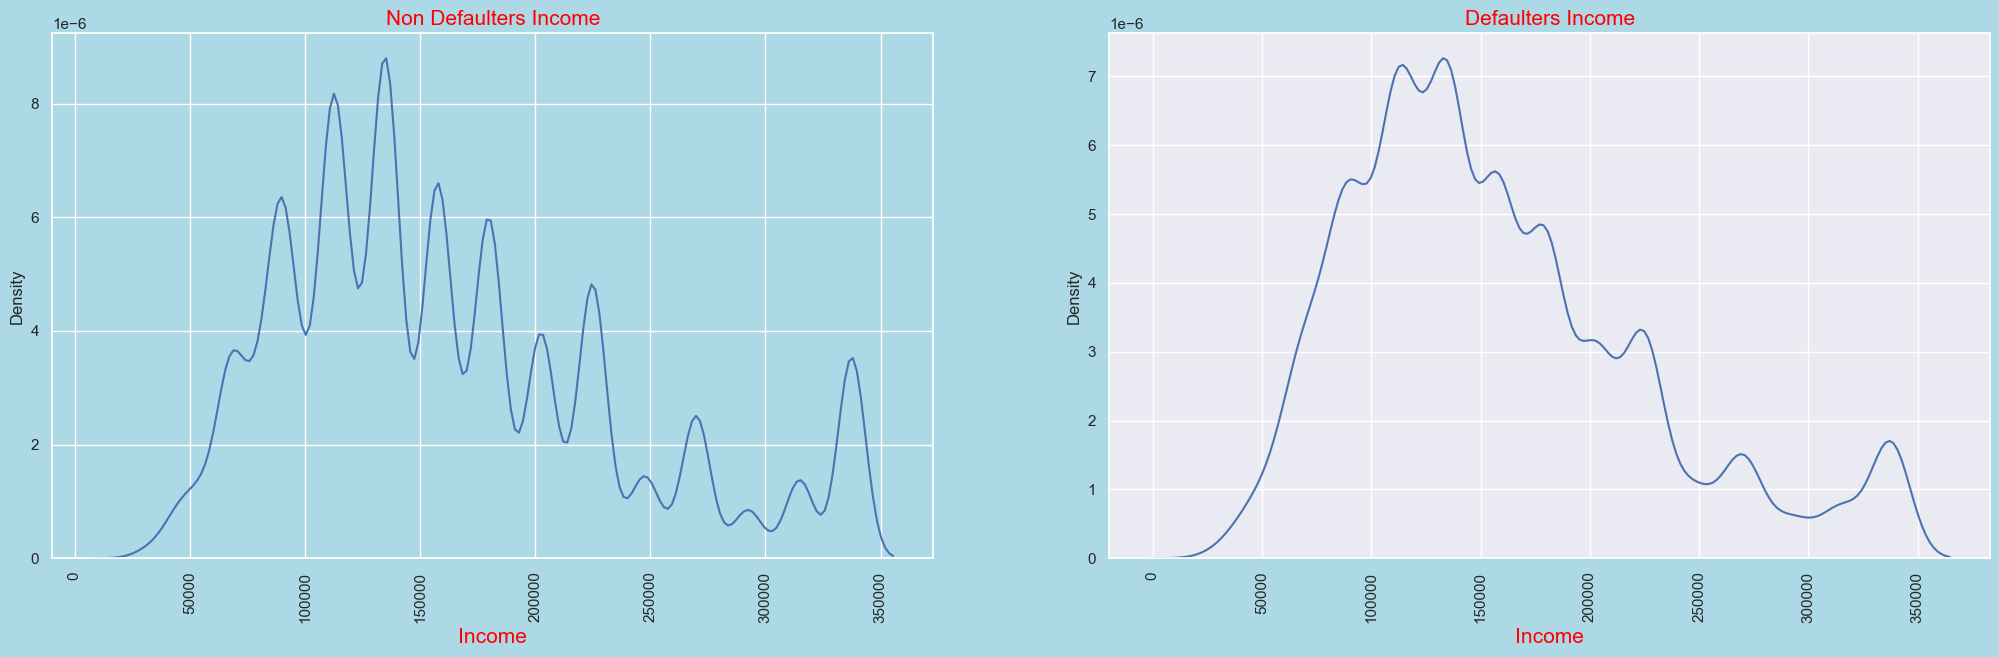

In [113]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.distplot(target_value_0.AMT_INCOME_TOTAL, hist = False)
plt.title('Non Defaulters Income', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Income', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.distplot(target_value_1.AMT_INCOME_TOTAL, hist = False, kde = True)
plt.title('Defaulters Income', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Income', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

Summary:

Most of the defaulters are earning between 1lakhs to 1.7lakhs annually.

AMT_CREDIT

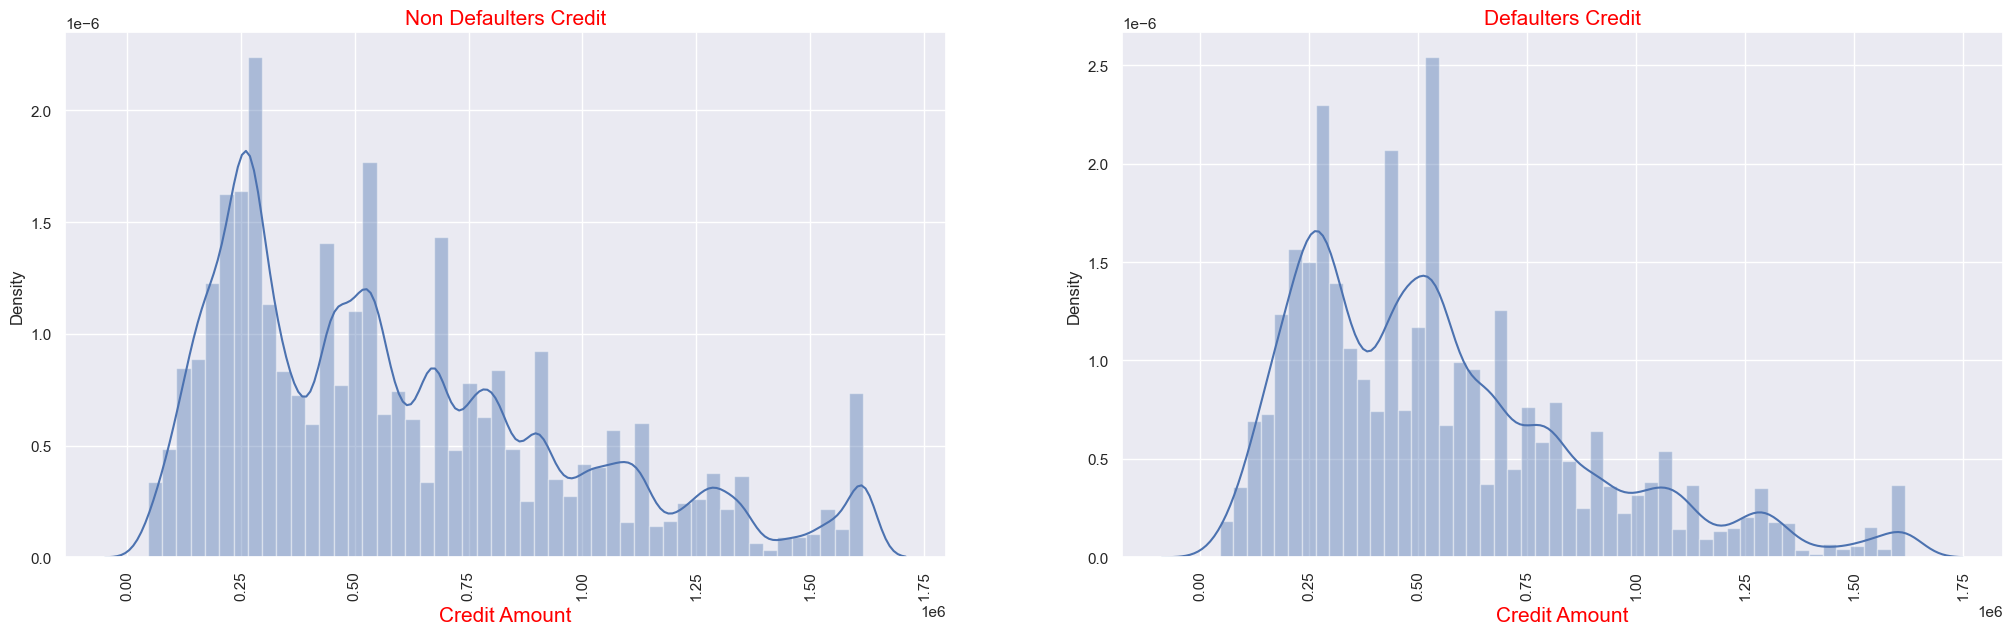

In [114]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.distplot(target_value_0.AMT_CREDIT, hist = True, kde = True)
plt.title('Non Defaulters Credit', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Credit Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.distplot(target_value_1.AMT_CREDIT, hist = True, kde = True)
plt.title('Defaulters Credit', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Credit Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

Summary:

We can see that the lesser the credit amount of the loan, the more chances of being a defaulter. We can see that the spike is high till 0.50 which is 500000.

AMT_ANNUITY

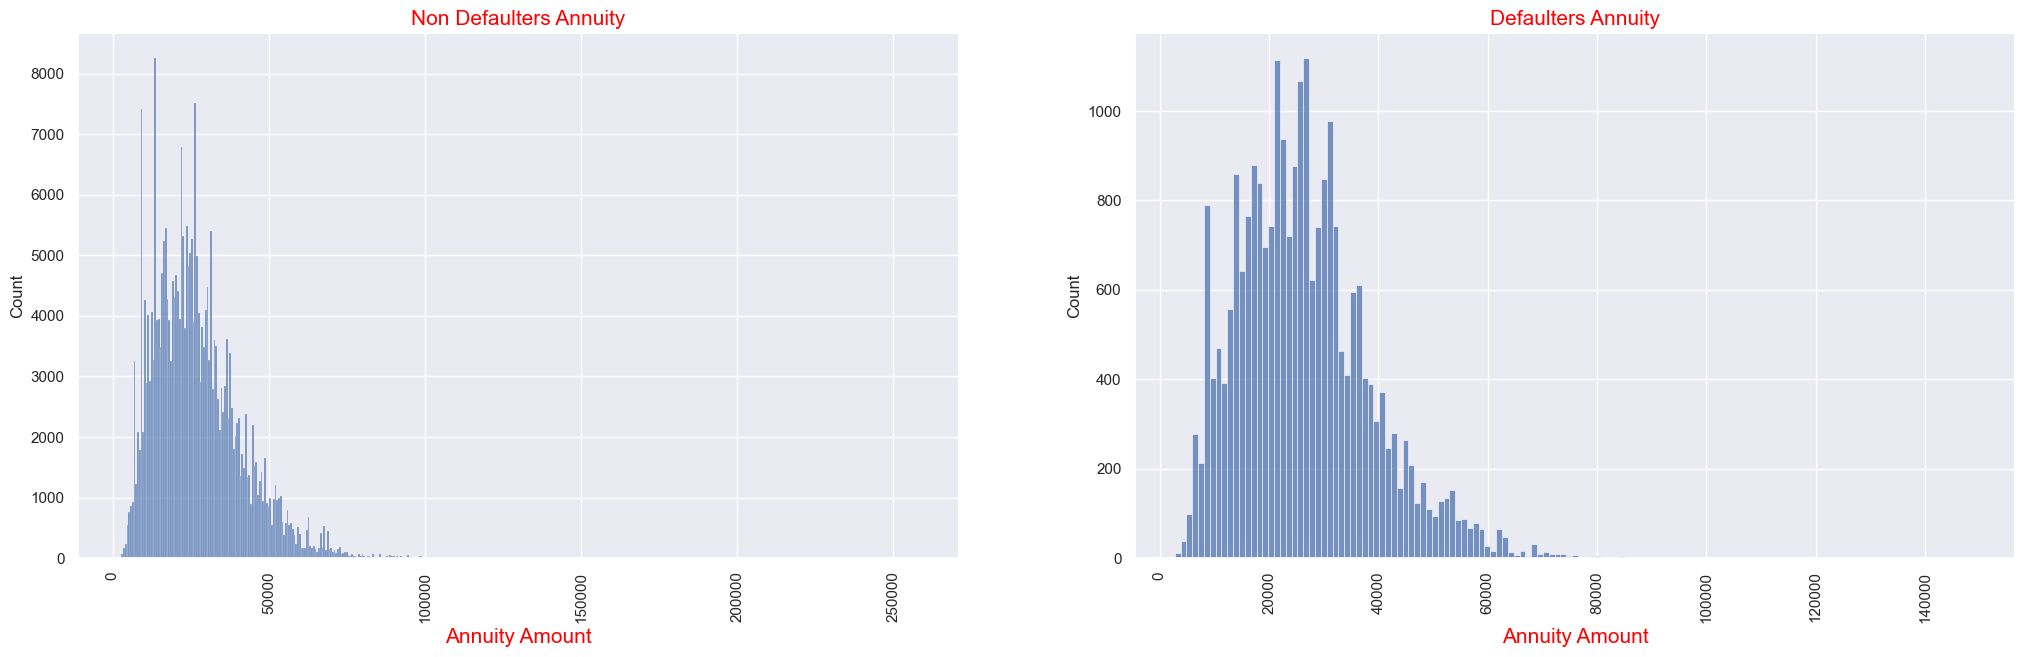

In [115]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.histplot(target_value_0.AMT_ANNUITY)
plt.title('Non Defaulters Annuity', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Annuity Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.histplot(target_value_1.AMT_ANNUITY)
plt.title('Defaulters Annuity', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Annuity Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

Summary:

Defaulters are having loan annuity between 15000 to 30000.

AMT_GOODS_PRICE

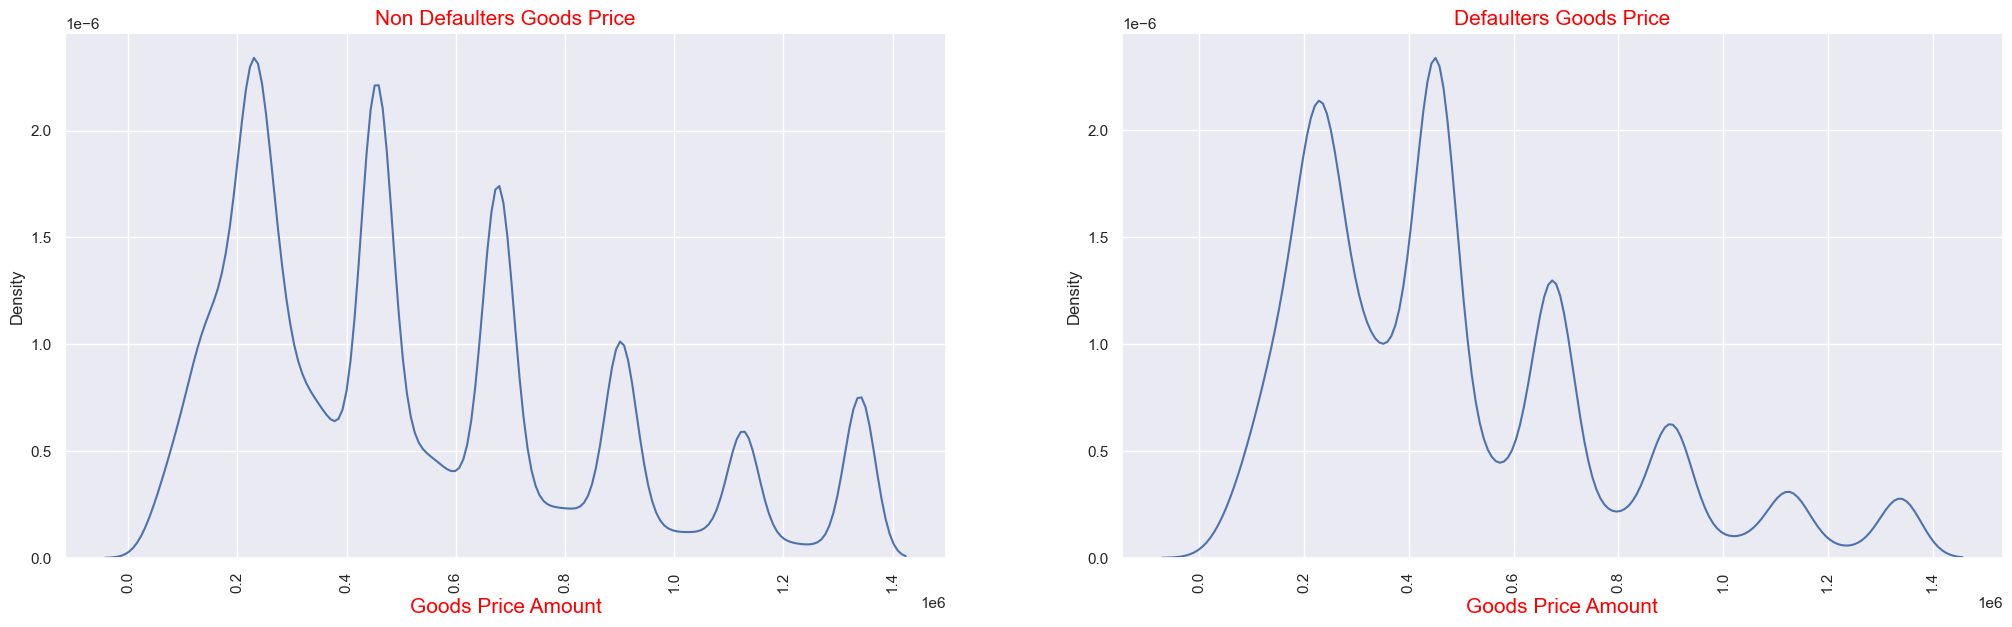

In [117]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.kdeplot(target_value_0.AMT_GOODS_PRICE)
plt.title('Non Defaulters Goods Price', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Goods Price Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.kdeplot(target_value_1.AMT_GOODS_PRICE)
plt.title('Defaulters Goods Price', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Goods Price Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

Summary:

Defaulters Goods price amount is largely lying between 0.2(200000) to 0.5(500000)

Age

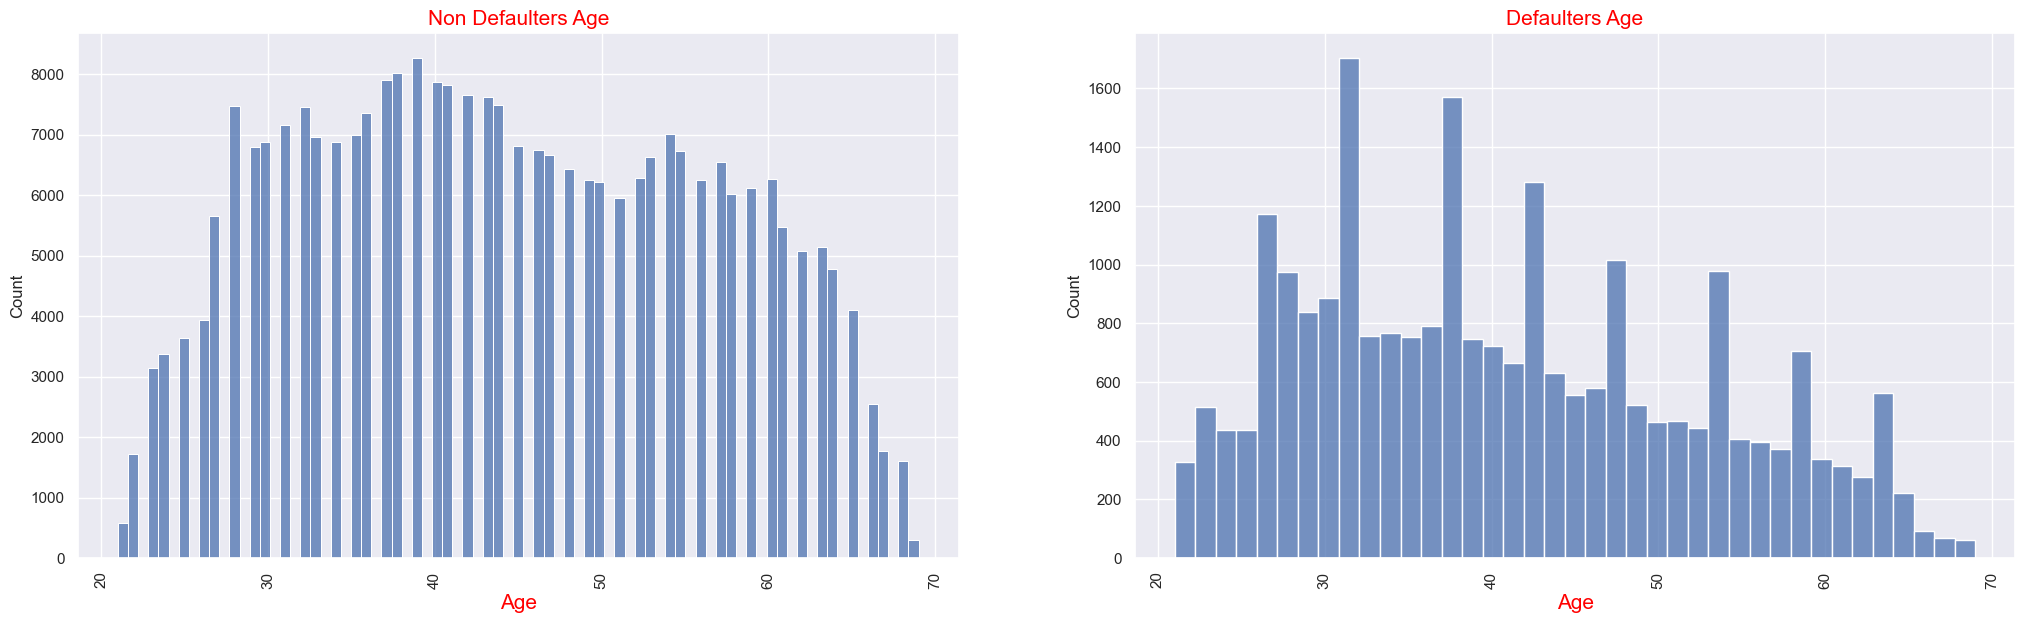

In [118]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.histplot(target_value_0.Age)
plt.title('Non Defaulters Age', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Age', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.histplot(target_value_1.Age)
plt.title('Defaulters Age', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Age', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

Summary:

The defaulters age is lying mostly between 25 to 45. Middle age people are getting defaulters more compared to other age people.

Bivariate Analysis

In [119]:
print(continious_data_cols,'\n')
print(categorical_data_cols)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age'] 

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS']


Continious variables can be seen as numerical variables. We can check the correlation between these variables.

In [120]:
corr_for_defaulters = target_value_1[continious_data_cols]
corr_for_defaulters.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_EMPLOYED  \
0           202500.0    406597.5      24700.5         351000.0            637   
26          112500.0    979992.0      27076.5         702000.0           2628   
40          202500.0   1193580.0      35028.0         855000.0           1262   
42          135000.0    288873.0      16258.5         238500.0           3597   
81           81000.0    252000.0      14593.5         252000.0         365243   

    EXT_SOURCE_2  EXT_SOURCE_3  Age  
0       0.262949      0.139376   26  
26      0.548477      0.190706   51  
40      0.306841      0.320163   48  
42      0.674203      0.399676   37  
81      0.023952      0.720944   68

In [121]:
corr_for_defaulters.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.355803     0.436348         0.357775   
AMT_CREDIT                0.355803    1.000000     0.750721         0.982183   
AMT_ANNUITY               0.436348    0.750721     1.000000         0.752308   
AMT_GOODS_PRICE           0.357775    0.982183     0.752308         1.000000   
DAYS_EMPLOYED            -0.125535    0.003289    -0.081363         0.008149   
EXT_SOURCE_2              0.145069    0.120587     0.116048         0.130552   
EXT_SOURCE_3             -0.086962    0.052939     0.032394         0.054211   
Age                      -0.002804    0.137802     0.014135         0.139150   

                  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3       Age  
AMT_INCOME_TOTAL      -0.125535      0.145069     -0.086962 -0.002804  
AMT_CREDIT             0.003289      0.120587      0.052939  0.137802  
AMT_ANNUITY           -0.081363      0.116048      0.032394  0.014135  
AMT_GOODS_PRICE        0.008149      0.130552      0.054211  0.139150  
DAYS_EMPLOYED          1.000000      0.000963      0.082336  0.581862  
EXT_SOURCE_2           0.000963      1.000000      0.048949  0.108397  
EXT_SOURCE_3           0.082336      0.048949      1.000000  0.134242  
Age                    0.581862      0.108397      0.134242  1.000000

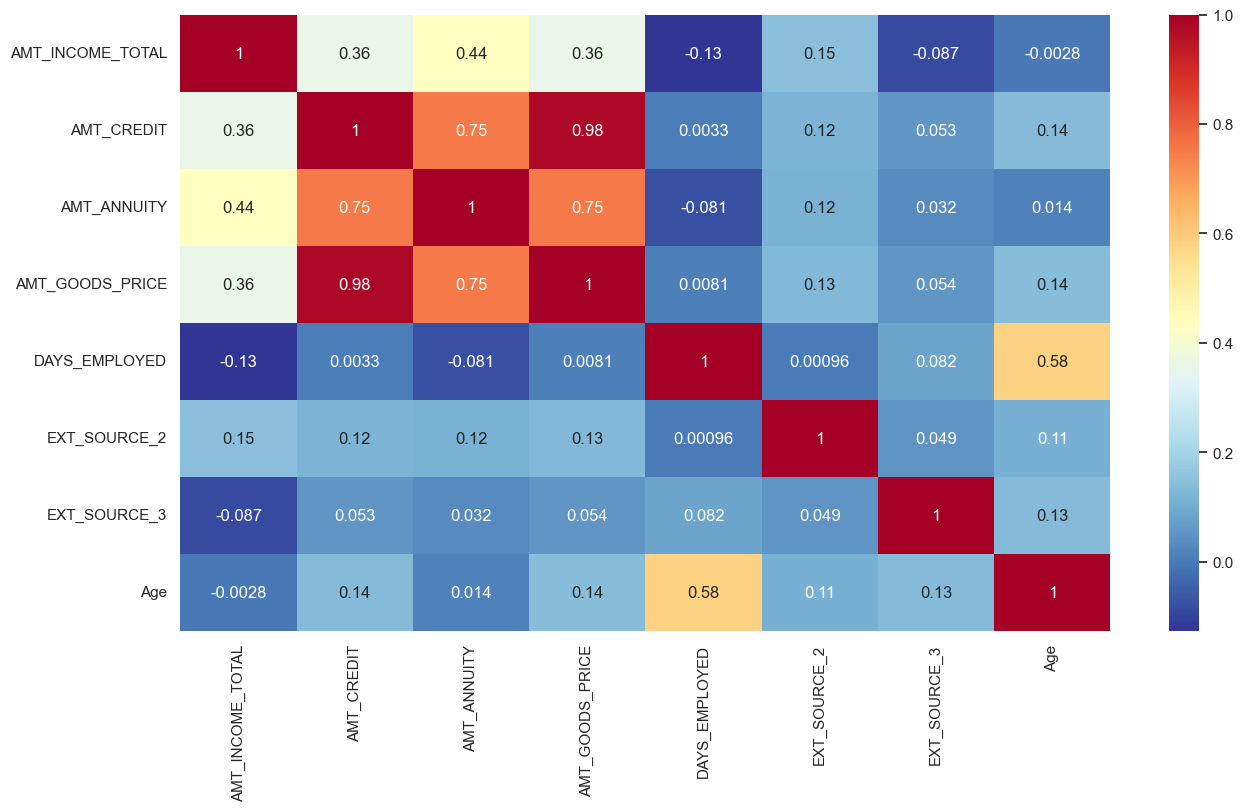

In [122]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

Summary:

1. I have taken the defaulter dataframe here.
2. The more the correlated percentage means the high value for being a defaulter.
3. 0.98% = AMT_CREDIT & AMT_GOODS_PRICE.
4. 0.75% = AMT_CREDIT & AMT_ANNUITY.
5. 0.75% = AMT_GOODS_PRICE & AMT_ANNUITY.
6. 0.58% = Age & DAYS_EMPLOYED

The same way we can check for the non-defaulters

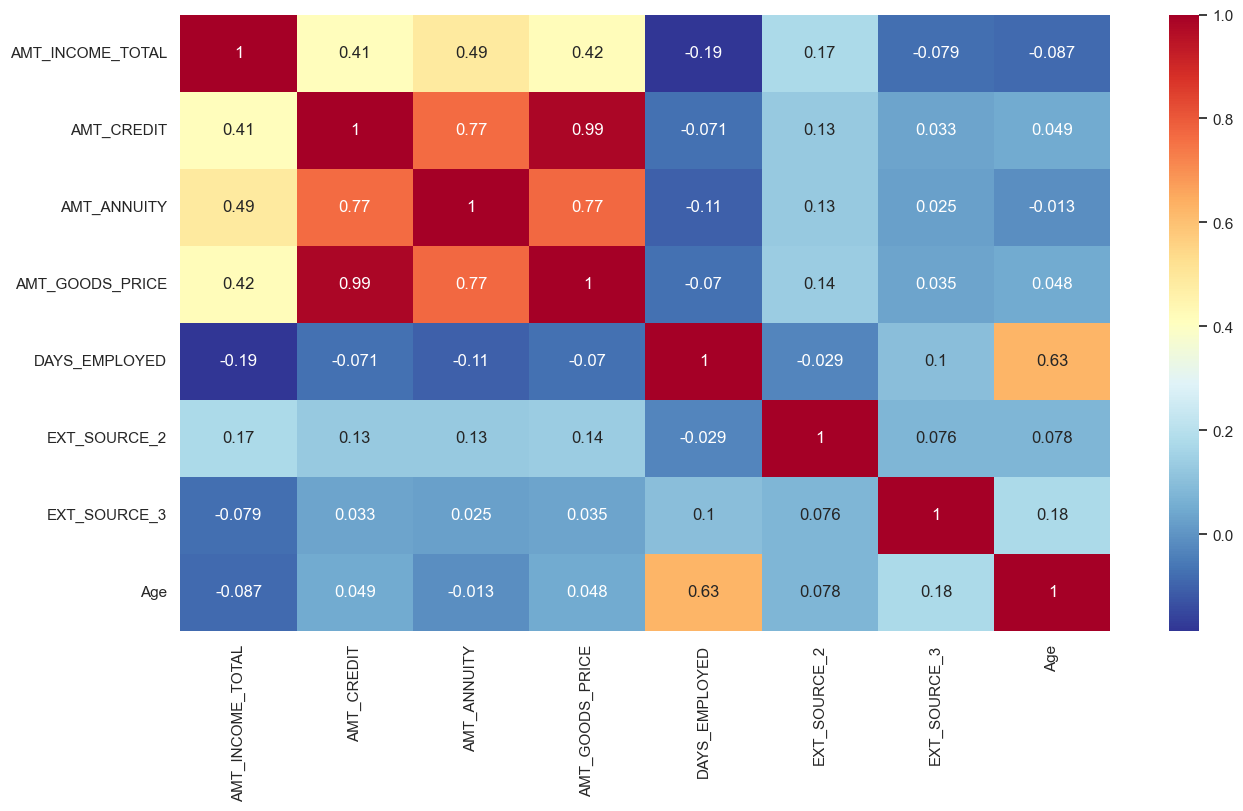

In [123]:
corr_for_non_defaulters = target_value_0[continious_data_cols]
plt.figure(figsize = (15,8))
sns.heatmap(corr_for_non_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

Summary:

1. I have taken the Non-defaulter dataframe here.
2. The more the correlated percentage means the high value for being a Non-defaulter.
3. 0.99% = AMT_CREDIT & AMT_GOODS_PRICE.
4. 0.77% = AMT_CREDIT & AMT_ANNUITY.
5. 0.77% = AMT_GOODS_PRICE & AMT_ANNUITY.
6. 0.63% = Age & DAYS_EMPLOYED

We can come to conclusion that there is a similarity between columns when it comes to default and non-default data correlation. The column relation which are hsowing higher percentage of correlation in Non-defaulters are the one showing in defaulters correlation.

1. AMT_CREDIT & AMT_INCOME_TOTAL & CODE_GENDER

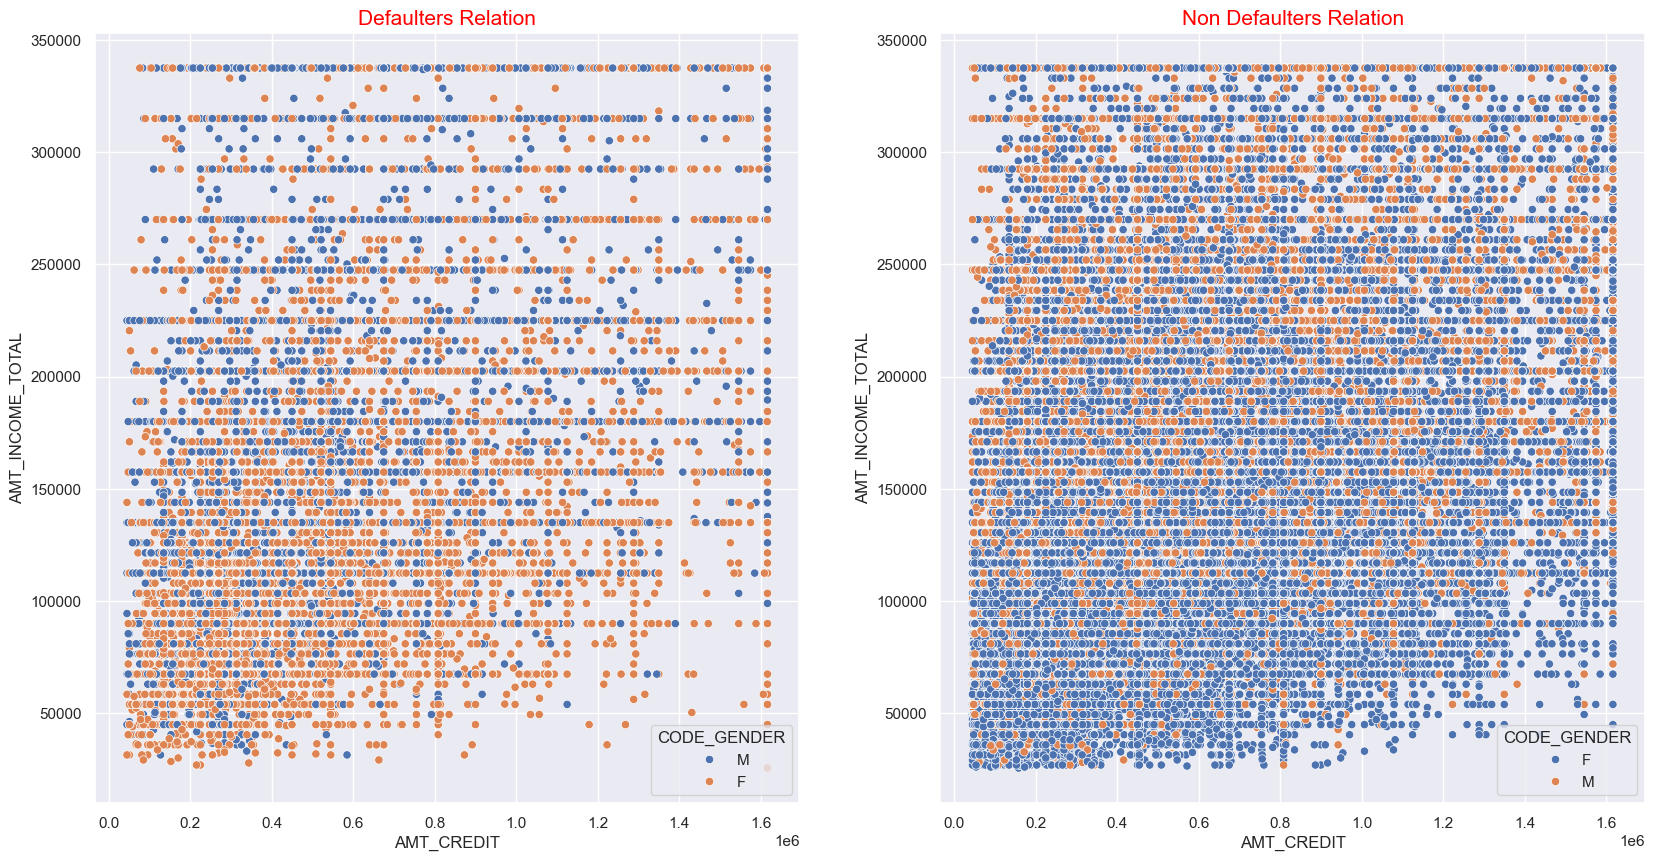

In [124]:
# We will do scatter plot analysis

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(x = target_value_1.AMT_CREDIT,y = target_value_1.AMT_INCOME_TOTAL, hue = target_value_1.CODE_GENDER, data = target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(x = target_value_0.AMT_CREDIT,y = target_value_0.AMT_INCOME_TOTAL, hue = target_value_0.CODE_GENDER, data = target_value_0)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.show()

Summary:

1. For Non-Defaulters: The values are evenly distributed AMT_CRETI and AMT_INCOME_TOTAL. There no distinguish between Male and female. its looks like all are having same ratio in this plot. So, Its hard to figure it out here.
2. For Defaulters: There are more congested values in initial or lower areas of both AMT_CREDIT and AMT_INCOME_TOTAL. With the Income the LOAN value also increses.

2. Numericals to Numericals Analysis

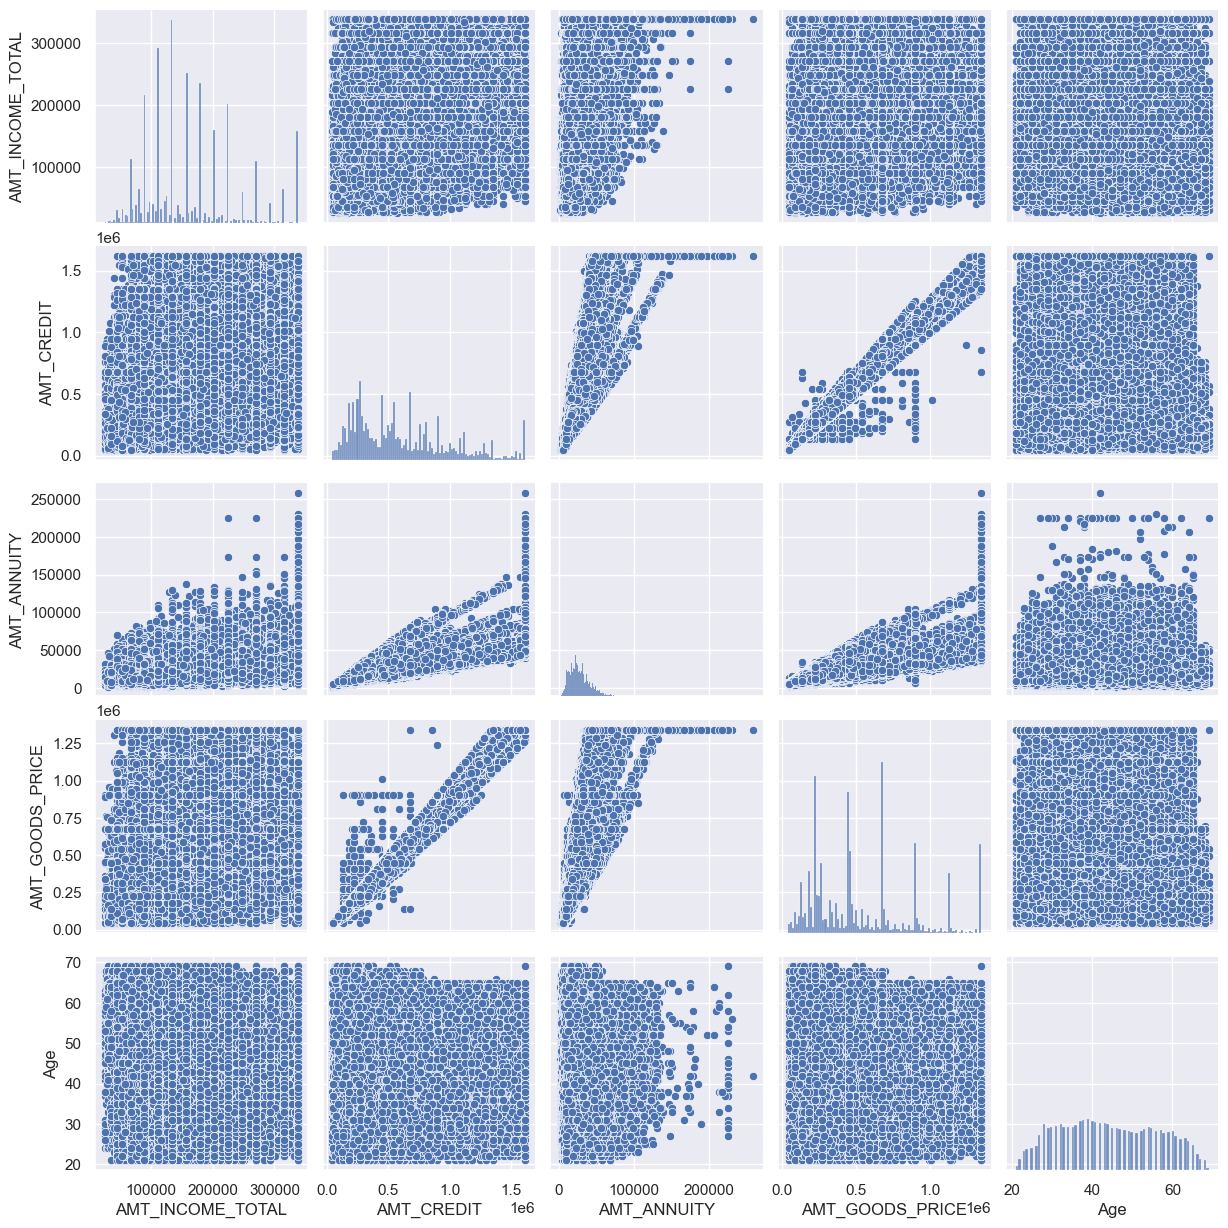

In [125]:
# Pair plots between variables and checking for Non-Defaulters

sns.pairplot(target_value_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']])
plt.show()

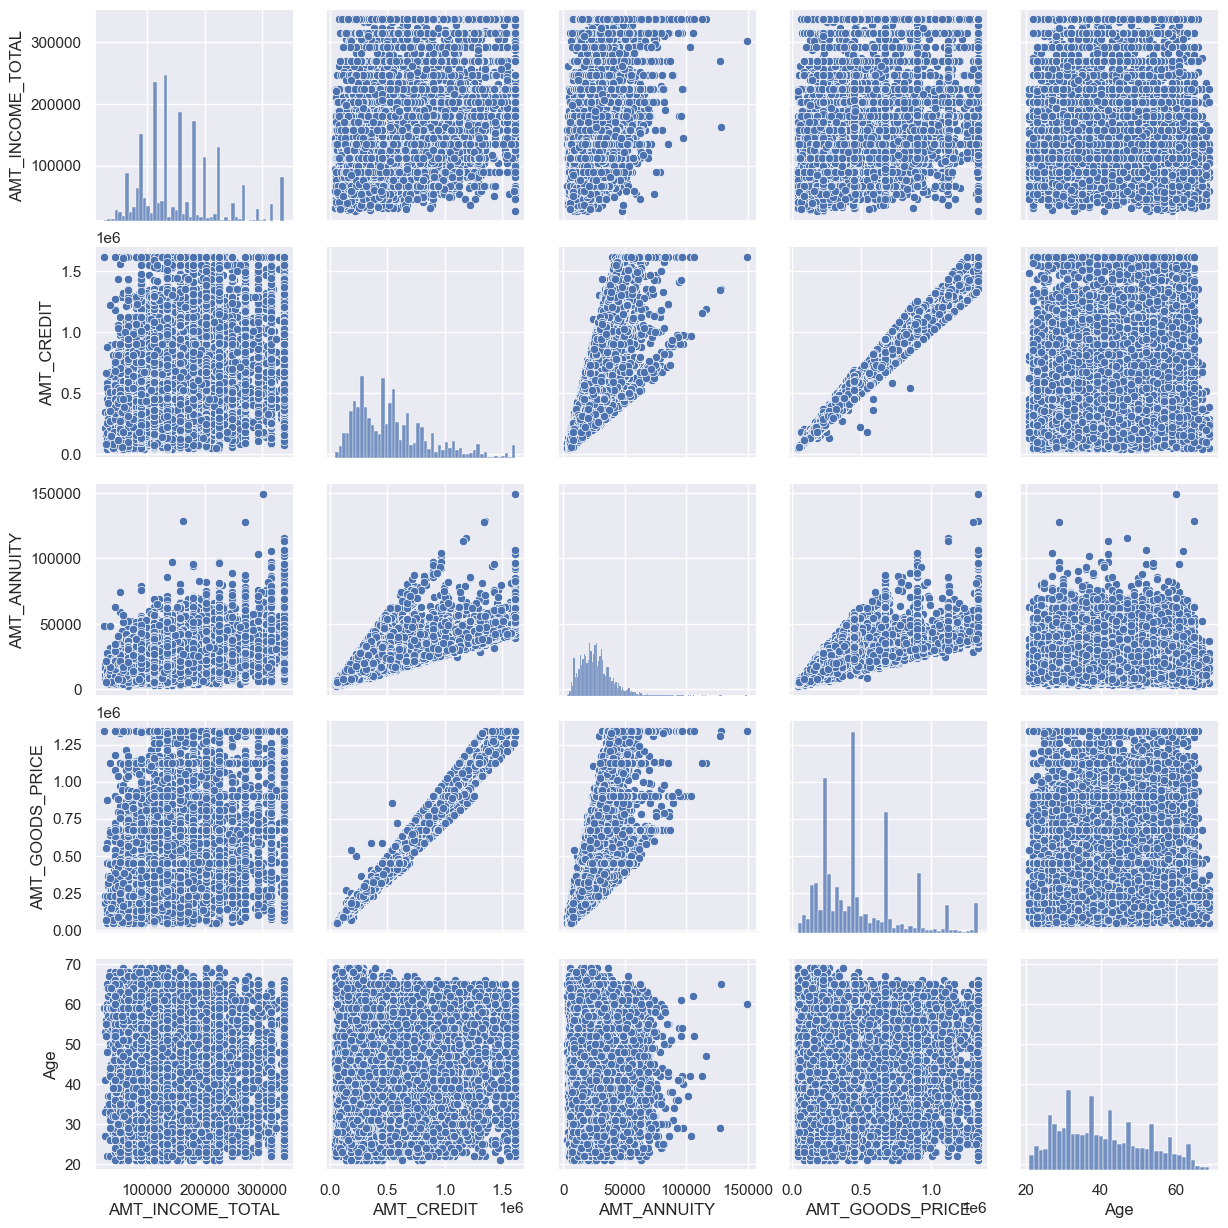

In [126]:
#Pair Plots for Defaulters

sns.pairplot(target_value_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']])
plt.show()

3. EDUCATION_TYPE & CODE_GENDER & AMT_INCOME_TOTAL

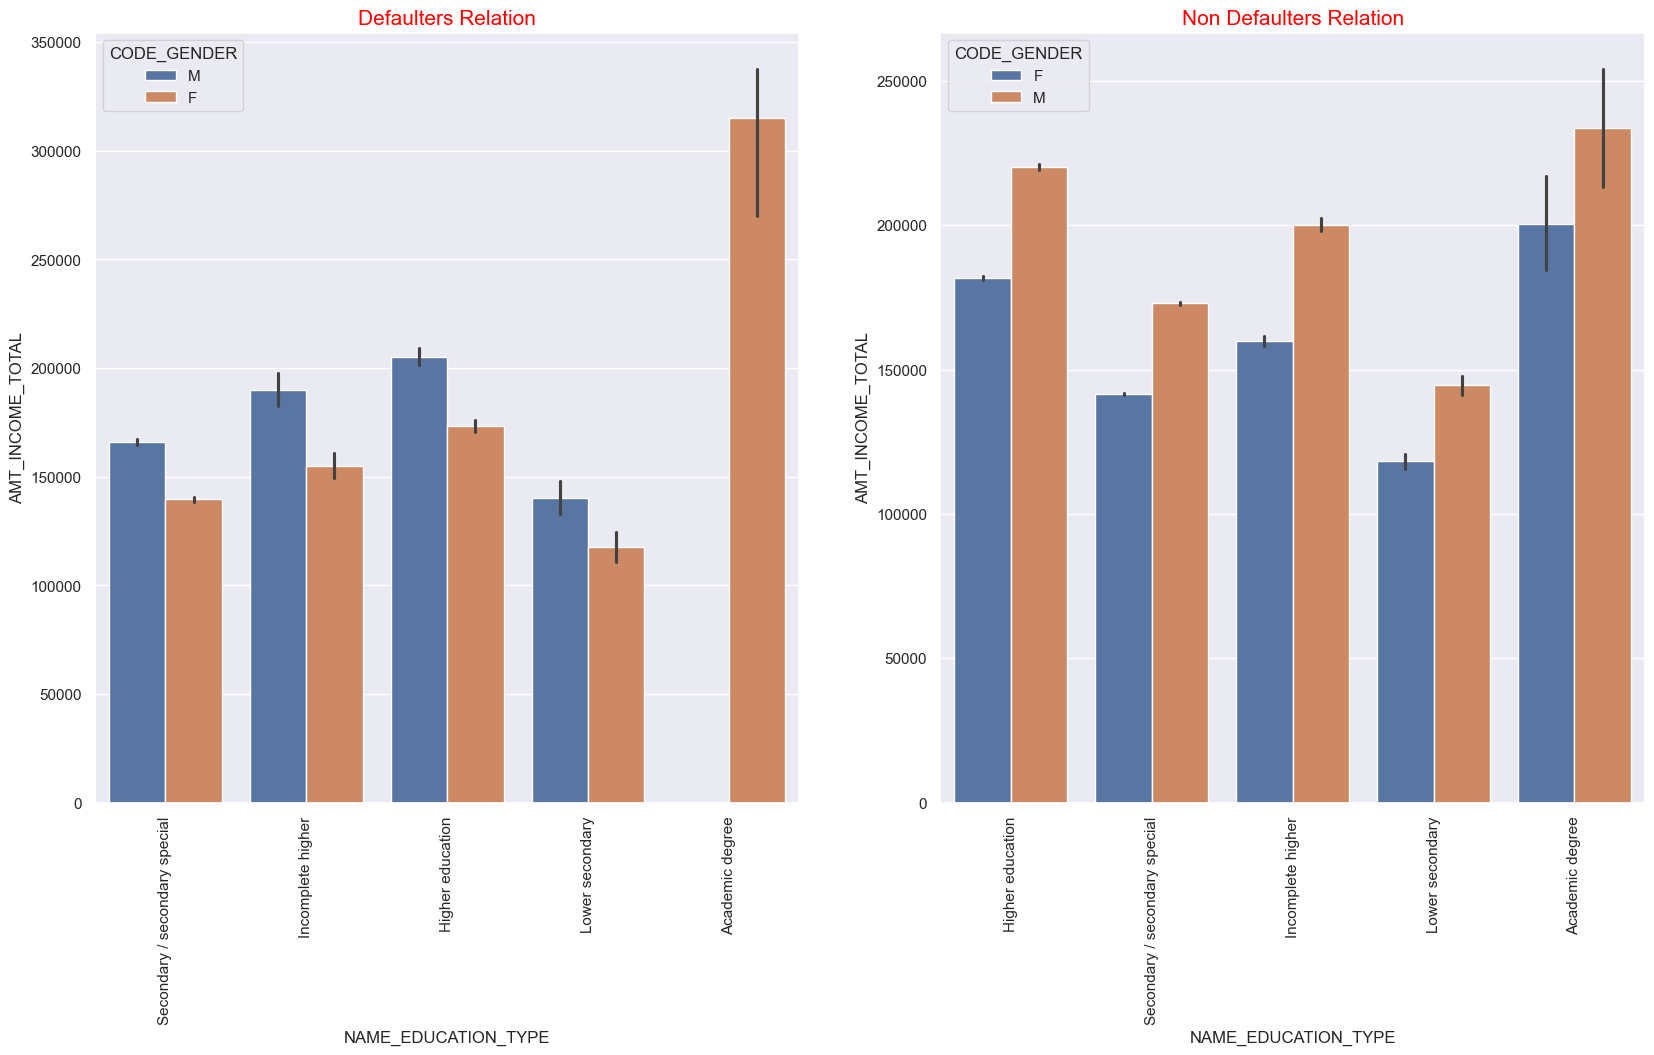

In [127]:
# We will do scatter plot else we can do line plot as well for this analysis

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.barplot(x = target_value_1.NAME_EDUCATION_TYPE,y = target_value_1.AMT_INCOME_TOTAL, hue = target_value_1.CODE_GENDER, data = target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x = target_value_0.NAME_EDUCATION_TYPE,y = target_value_0.AMT_INCOME_TOTAL, hue = target_value_0.CODE_GENDER, data = target_value_0)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Summary:

1. Defaulters: Female Academic Degree holders are earning more but still there in defaulter list more. Where as not s single Academic male holders are in defaulter list.
But for rest of the education type we can see that males are earning more as well being the more defaulters.

2. Non Defaulters: Here also Female Academic degree holders are more and they are in high no when it comes to non defaulters. Nearly same amount non defaulter are there for guys who studied Higher education. Applied to both male and female. Female in all educational aspects are more non-defaulters than male.

4.NAME_CONTRACT_TYPE & CODE_GENDER

In [128]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')

CODE_GENDER                F         M
NAME_CONTRACT_TYPE                    
Cash loans          0.071811  0.105772
Revolving loans     0.052664  0.058503

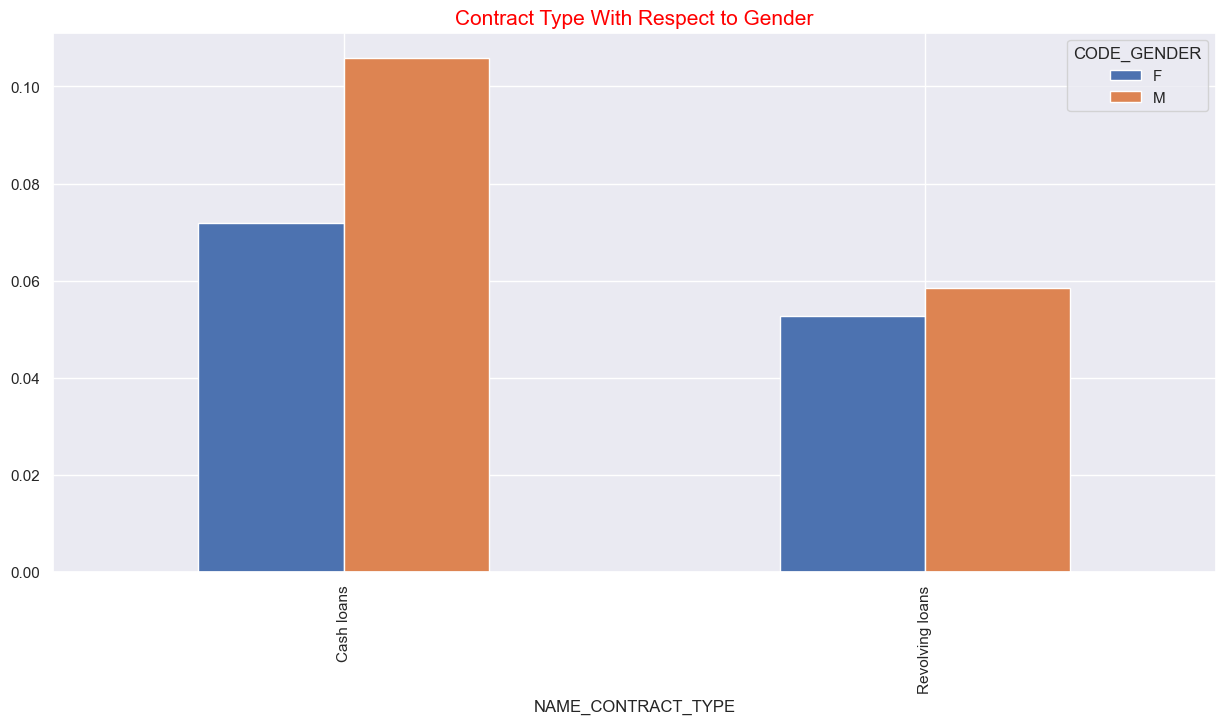

In [129]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER', aggfunc = 'mean').plot.bar(figsize = (15,7))
plt.title('Contract Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

Summary:

1. Cashloans by males are more comapred to female and they are defaulters as well.
2. Revolving loans are also taken by male more and they are most defaulter

5.NAME_INCOME_TYPE & GENDER & TARGET

In [130]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Businessman           0.000000  0.000000
Commercial associate  0.066670  0.088287
Maternity leave       0.500000  0.000000
Pensioner             0.049534  0.073190
State servant         0.053353  0.068812
Student               0.000000  0.000000
Unemployed            0.352941  0.400000
Working               0.083713  0.114945

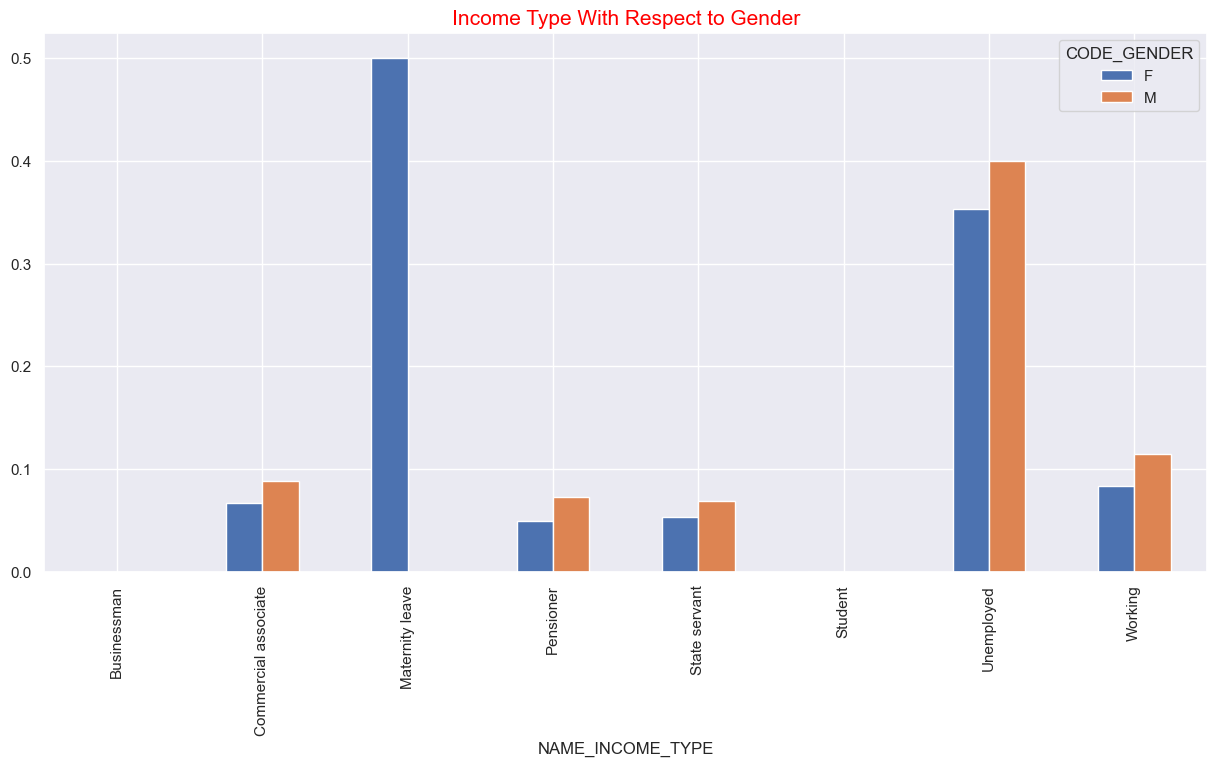

In [131]:
application_data.pivot_table(values = 'TARGET', index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean').plot.bar(figsize=(15,7))
plt.title('Income Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

Summary:

1. We can see that Unemployed people are more defaulters in both male and female case.
2. Males are more unemployed than female.
3. Maternity leave females are also in higher no in defaulters list.
4. Male nos are more compare to female in defaulters list.

PREVIOUS DATSET ANALYSIS:

Data Loading and Cleaning

In [135]:
previous_data = pd.read_csv(r"data\previous\previous_application.csv")
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [136]:
previous_data.shape

(1670214, 37)

In [137]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [138]:
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [140]:
null_previous_data = previous_data.isnull().mean() * 100

In [141]:
null_previous_data.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_PREV                      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_ST

Now as we know, we can drop those columns which are having more than 40% of null values

In [142]:
list_of_columns_to_be_drop = null_previous_data[null_previous_data.values >=40.00].index.tolist()
previous_data.drop(list_of_columns_to_be_drop, inplace = True, axis = 1)
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [143]:
previous_data.shape

(1670214, 26)

Handling Negative values

In [144]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [145]:
previous_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

Dropping the irrelevants columns

In [146]:
column_list = ['FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'WEEKDAY_APPR_PROCESS_START']
previous_data.drop(column_list, inplace = True, axis =1)
print(previous_data.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [147]:
previous_data.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

Let's try to remove all the XNA present in all columns and replace them with Null value

In [149]:
previous_data = previous_data.replace('XNA',np.nan)
previous_data = previous_data.replace('XPA', np.nan)

In [150]:
previous_data.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64

Importing Missing Values

(previous_data.isnull().mean()*100).sort_values(ascending = False)

The Null Percentage increased due to i replaced the XAP and XNA values with NAN value.

In [151]:
# Drop those columns which are having null values above 30%

column_list = ['NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY', 'NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE']
previous_data.drop(column_list, inplace = True, axis =1)
print(previous_data.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')


In [152]:
(previous_data.isnull().mean()*100).sort_values(ascending = False)

NAME_YIELD_GROUP        30.966990
AMT_GOODS_PRICE         23.081773
AMT_ANNUITY             22.286665
CNT_PAYMENT             22.286366
NAME_PORTFOLIO          22.286366
CODE_REJECT_REASON       0.313972
NAME_CLIENT_TYPE         0.116213
PRODUCT_COMBINATION      0.020716
NAME_CONTRACT_TYPE       0.020716
AMT_CREDIT               0.000060
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
AMT_APPLICATION          0.000000
DAYS_DECISION            0.000000
NAME_CONTRACT_STATUS     0.000000
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
dtype: float64

In [153]:
total_null_rows = len(previous_data[((np.isnan(previous_data['AMT_ANNUITY']) & np.isnan(previous_data['AMT_GOODS_PRICE']) & np.isnan(previous_data['CNT_PAYMENT'])))])
total_null_rows

333855

In [154]:
previous_data.shape

(1670214, 17)

Total ROWS = 1670214
Null Rows = 333855

We can't just put the mean, median or mode values in these columns as its going to imbalance the whole calculation. This no is not big compare to the total rows. So, we can drop these rows.

In [155]:
previous_data = previous_data[(~(np.isnan(previous_data['AMT_ANNUITY']) & np.isnan(previous_data['AMT_GOODS_PRICE']) & np.isnan(previous_data['CNT_PAYMENT'])))]
previous_data.shape

(1336359, 17)

In [156]:
previous_data.isnull().mean() *100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY              2.871983
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000075
AMT_GOODS_PRICE          3.865728
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.389117
NAME_CLIENT_TYPE         0.070041
NAME_PORTFOLIO           2.871609
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT              2.871609
NAME_YIELD_GROUP        13.720864
PRODUCT_COMBINATION      0.000000
dtype: float64

AMT_ANUITY

In [157]:
previous_data.AMT_ANNUITY.describe().apply(lambda p: '%.2f' % p)

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
25%         6321.78
50%        11250.00
75%        20658.42
max       418058.15
Name: AMT_ANNUITY, dtype: object

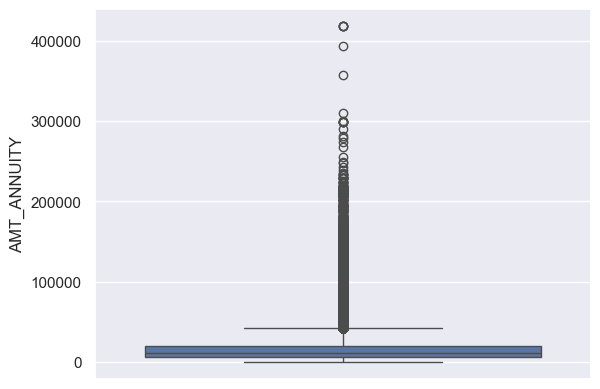

In [158]:
sns.boxplot(previous_data.AMT_ANNUITY)
plt.show()

In [159]:
Annuity_null_mean = previous_data.AMT_ANNUITY.mean()

In [160]:
previous_data.AMT_ANNUITY = previous_data.AMT_ANNUITY.fillna(Annuity_null_mean)
print(previous_data.AMT_ANNUITY.isnull().mean()*100)

0.0


In [161]:
#remove Outliers now
q1=previous_data["AMT_ANNUITY"].describe()["25%"]
q3=previous_data["AMT_ANNUITY"].describe()["75%"]
iqr=q3-q1 #interquartile range
upper_bound=q3+1.5*iqr
previous_data["AMT_ANNUITY"]=np.where(previous_data["AMT_ANNUITY"]>upper_bound,upper_bound,previous_data["AMT_ANNUITY"])

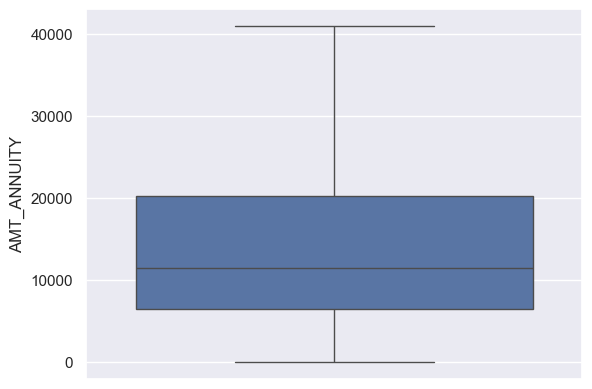

In [162]:
sns.boxplot(previous_data.AMT_ANNUITY)
plt.show()

In [163]:
previous_data.isnull().mean()*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY              0.000000
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000075
AMT_GOODS_PRICE          3.865728
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.389117
NAME_CLIENT_TYPE         0.070041
NAME_PORTFOLIO           2.871609
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT              2.871609
NAME_YIELD_GROUP        13.720864
PRODUCT_COMBINATION      0.000000
dtype: float64

In [164]:
    print(previous_data['AMT_GOODS_PRICE'].describe().apply(lambda p: '%.2f' % p))

count    1284699.00
mean      227847.28
std       315396.56
min            0.00
25%        50841.00
50%       112320.00
75%       234000.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: object


In [165]:
previous_data = previous_data[~np.isnan(previous_data['AMT_GOODS_PRICE'])]
# We can do this with drop method as well. 

In [166]:
print(previous_data['AMT_CREDIT'].describe().apply(lambda p: '%.2f' % p))

count    1284699.00
mean      243998.64
std       343002.72
min            0.00
25%        50319.00
50%       112500.00
75%       268060.50
max      6905160.00
Name: AMT_CREDIT, dtype: object


In [167]:
previous_data = previous_data[~np.isnan(previous_data['AMT_CREDIT'])]

In [168]:
(previous_data.isnull().mean()*100).sort_values(ascending = False)

NAME_YIELD_GROUP        10.251429
CNT_PAYMENT              2.987081
NAME_PORTFOLIO           2.987081
CODE_REJECT_REASON       0.318830
NAME_CLIENT_TYPE         0.072858
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
AMT_ANNUITY              0.000000
NAME_CONTRACT_TYPE       0.000000
DAYS_DECISION            0.000000
NAME_CONTRACT_STATUS     0.000000
AMT_GOODS_PRICE          0.000000
AMT_CREDIT               0.000000
AMT_APPLICATION          0.000000
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
PRODUCT_COMBINATION      0.000000
dtype: float64

In [169]:
print(previous_data['CNT_PAYMENT'].describe().apply(lambda p: '%.2f' % p))

count    1246324.00
mean          16.72
std           14.49
min            0.00
25%            6.00
50%           12.00
75%           24.00
max           84.00
Name: CNT_PAYMENT, dtype: object


In [170]:
previous_data.CNT_PAYMENT = previous_data.CNT_PAYMENT.fillna(previous_data.CNT_PAYMENT.mean()) 

In [171]:
previous_data.CNT_PAYMENT.isnull().mean()*100

np.float64(0.0)

In [172]:
previous_data.isnull().mean()*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY              0.000000
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
AMT_GOODS_PRICE          0.000000
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.318830
NAME_CLIENT_TYPE         0.072858
NAME_PORTFOLIO           2.987081
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT              0.000000
NAME_YIELD_GROUP        10.251429
PRODUCT_COMBINATION      0.000000
dtype: float64

REMOVE OUTLIERS USING LOOP

In [173]:
# I have imputed and removed some of the columns which i want to analyse here.

columns_list = ['AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION']

for column in columns_list:
    
    #remove Outliers now
    q1=previous_data[column].describe()["25%"]
    q3=previous_data[column].describe()["75%"]
    iqr=q3-q1 #interquartile range
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    previous_data[column]=np.where(previous_data[column]>upper_bound,upper_bound,previous_data[column])
    previous_data[column]=np.where(previous_data[column]<lower_bound,lower_bound,previous_data[column])

In [174]:
previous_data.shape

(1284699, 17)

After removal of outliers we can see that the no of rows are now reduced more.

Univariate Analysis

In [175]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [176]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284699 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1284699 non-null  int64  
 1   SK_ID_CURR            1284699 non-null  int64  
 2   NAME_CONTRACT_TYPE    1284699 non-null  object 
 3   AMT_ANNUITY           1284699 non-null  float64
 4   AMT_APPLICATION       1284699 non-null  float64
 5   AMT_CREDIT            1284699 non-null  float64
 6   AMT_GOODS_PRICE       1284699 non-null  float64
 7   NAME_CONTRACT_STATUS  1284699 non-null  object 
 8   DAYS_DECISION         1284699 non-null  float64
 9   CODE_REJECT_REASON    1280603 non-null  object 
 10  NAME_CLIENT_TYPE      1283763 non-null  object 
 11  NAME_PORTFOLIO        1246324 non-null  object 
 12  CHANNEL_TYPE          1284699 non-null  object 
 13  SELLERPLACE_AREA      1284699 non-null  int64  
 14  CNT_PAYMENT           1284699 non-null 

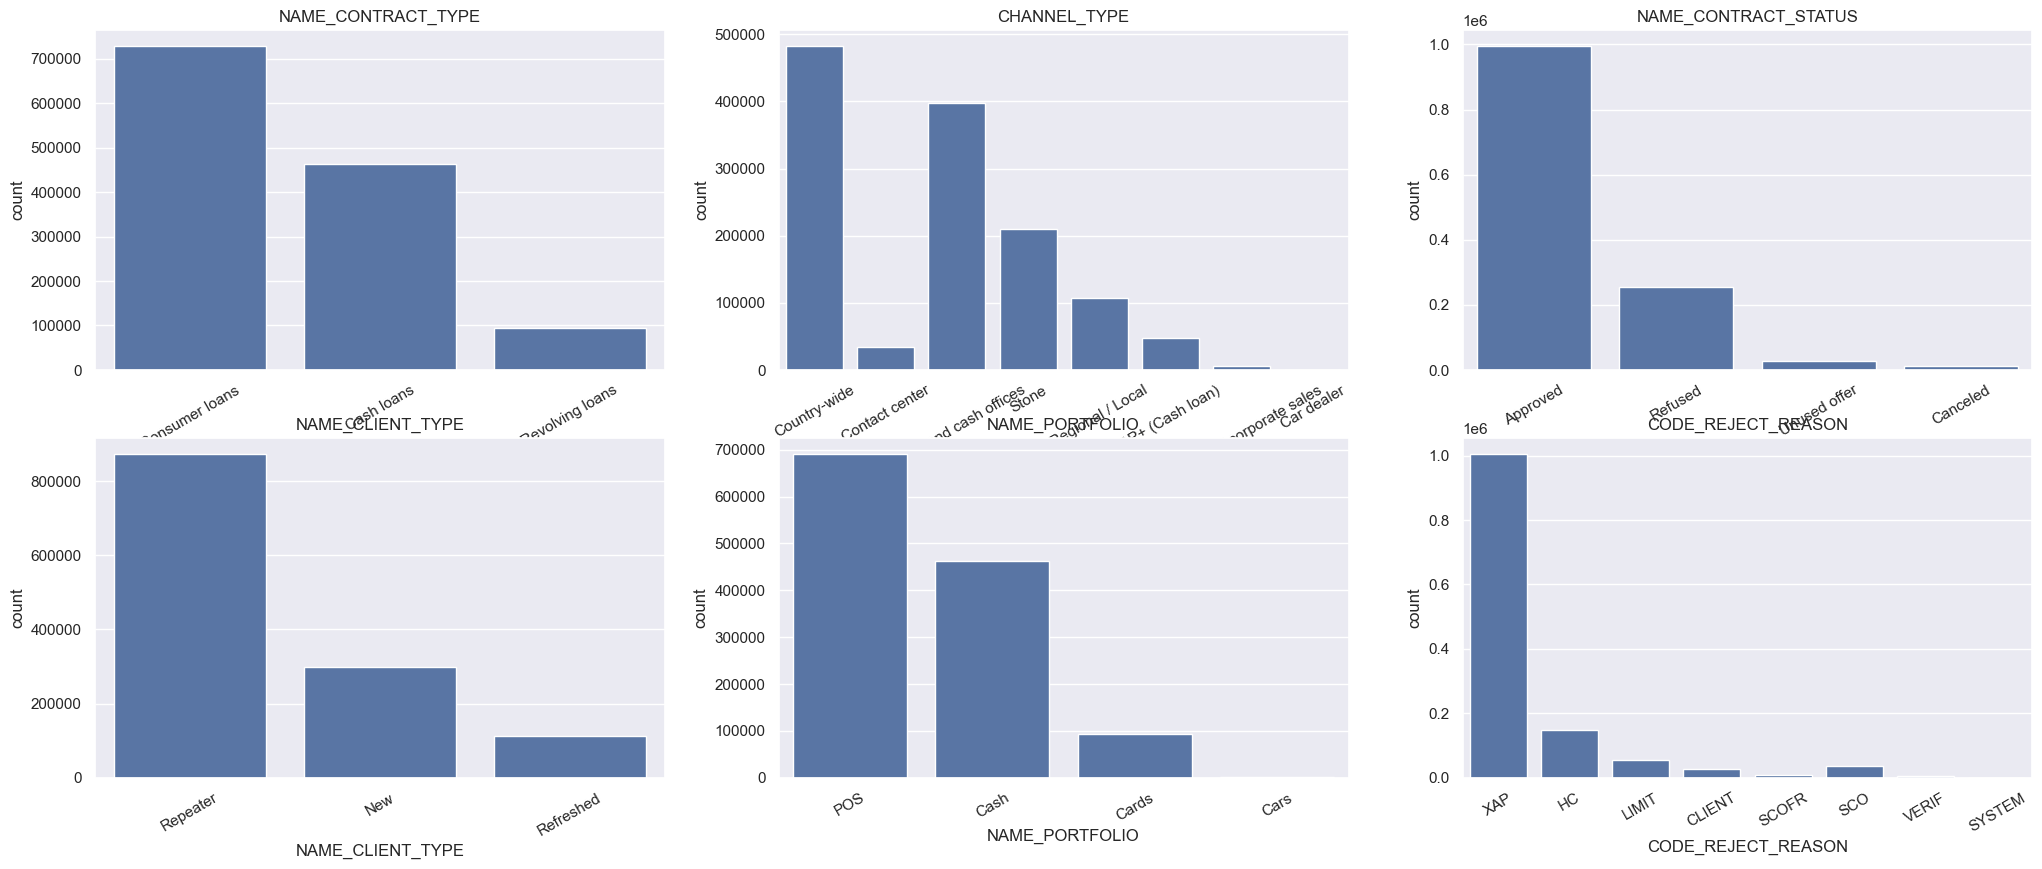

In [177]:
column_list = ['NAME_CONTRACT_TYPE', 'CHANNEL_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', "CODE_REJECT_REASON" ]

x = 0

plt.figure(figsize = (25,15))

for column in column_list:
    
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column, data = previous_data)
    plt.xticks(rotation = 30)
    plt.title(column)

Summary:

1. NAME_CONTRACT_TYPE: More COnsumer Loans and Less Revolving Loans
2. CHANNEL_TYPE: Except Contact center, AP+CashLoans and Car dealers all other are high in numbers.
3. NAME_CONTRACT_TYPE: Mostly approved, very less Refused and very few loans are cancelled.
4. NAME_CLIENT_TYPE: Most of the Clients are are repater client.
5. NAME_PORTFOLIO: POS are in huge numbers compare to Cash and cards.

In [178]:
previous_data.DAYS_DECISION

0           -73.0
1          -164.0
2          -301.0
3          -512.0
4          -781.0
            ...  
1670209    -544.0
1670210   -1694.0
1670211   -1488.0
1670212   -1185.0
1670213   -1193.0
Name: DAYS_DECISION, Length: 1284699, dtype: float64

In [179]:
previous_data.DAYS_DECISION = previous_data.DAYS_DECISION.astype('int')
print(previous_data.DAYS_DECISION.abs())

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1284699, dtype: int64


In [182]:
previous_data.DAYS_DECISION = previous_data.DAYS_DECISION.abs()
print(previous_data.DAYS_DECISION)

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1284699, dtype: int64


These are in Days, I can convert this into Months or Into Years

In [183]:
previous_data['MONTHS'] = round(previous_data.DAYS_DECISION/30)
previous_data.drop(["DAYS_DECISION"], axis =1)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans    1730.4300   
1           2802425      108129         Cash loans   25188.6150   
2           2523466      122040         Cash loans   15060.7350   
3           2819243      176158         Cash loans   40912.3575   
4           1784265      202054         Cash loans   31924.3950   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans   14704.2900   
1670210     2357031      334635     Consumer loans    6622.0200   
1670211     2659632      249544     Consumer loans   11520.8550   
1670212     2785582      400317         Cash loans   18821.5200   
1670213     2418762      261212         Cash loans   16431.3000   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  \
0                17145.0    17145.00          17145.0             Approved   
1               508738.5   594672.75         508738.5             Approved   
2               112500.0   136444.50         112500.0             Approved   
3               450000.0   470790.00         450000.0             Approved   
4               337500.0   404055.00         337500.0              Refused   
...                  ...         ...              ...                  ...   
1670209         267295.5   311400.00         267295.5             Approved   
1670210          87750.0    64291.50          87750.0             Approved   
1670211         105237.0   102523.50         105237.0             Approved   
1670212         180000.0   191880.00         180000.0             Approved   
1670213         360000.0   360000.00         360000.0             Approved   

        CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0                      XAP         Repeater            POS   
1                      XAP         Repeater           Cash   
2                      XAP         Repeater           Cash   
3                      XAP         Repeater           Cash   
4                       HC         Repeater           Cash   
...                    ...              ...            ...   
1670209                XAP        Refreshed            POS   
1670210                XAP              New            POS   
1670211                XAP         Repeater            POS   
1670212                XAP         Repeater           Cash   
1670213                XAP         Repeater           Cash   

                    CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0                   Country-wide                35         12.0   
1                 Contact center                -1         36.0   
2        Credit and cash offices                -1         12.0   
3        Credit and cash offices                -1         12.0   
4        Credit and cash offices                -1         24.0   
...                          ...               ...          ...   
1670209                    Stone                43         30.0   
1670210                    Stone                43         12.0   
1670211             Country-wide              1370         10.0   
1670212          AP+ (Cash loan)                -1         12.0   
1670213          AP+ (Cash loan)                -1         48.0   

        NAME_YIELD_GROUP          PRODUCT_COMBINATION  MONTHS  
0                 middle     POS mobile with interest     2.0  
1             low_action             Cash X-Sell: low     5.0  
2                   high            Cash X-Sell: high    10.0  
3                 middle          Cash X-Sell: middle    17.0  
4                   high            Cash Street: high    26.0  
...                  ...                          ...     ...  
1670209       low_normal   POS industry with interest    18.0  
1670210           middle   POS industry with interest    56.0  
1670211       low_normal  POS household with interest    50.0  
1670212       low_normal             Cash X-Sell: low    40.0  
1670213      

In [184]:
previous_data['MONTHS'] = round(previous_data.DAYS_DECISION/30)
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300          17145.0   
1     2802425      108129         Cash loans   25188.6150         508738.5   
2     2523466      122040         Cash loans   15060.7350         112500.0   
3     2819243      176158         Cash loans   40912.3575         450000.0   
4     1784265      202054         Cash loans   31924.3950         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0    17145.00          17145.0             Approved             73   
1   594672.75         508738.5             Approved            164   
2   136444.50         112500.0             Approved            301   
3   470790.00         450000.0             Approved            512   
4   404055.00         337500.0              Refused            781   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  \
0                XAP         Repeater            POS             Country-wide   
1                XAP         Repeater           Cash           Contact center   
2                XAP         Repeater           Cash  Credit and cash offices   
3                XAP         Repeater           Cash  Credit and cash offices   
4                 HC         Repeater           Cash  Credit and cash offices   

   SELLERPLACE_AREA  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0                35         12.0           middle  POS mobile with interest   
1                -1         36.0       low_action          Cash X-Sell: low   
2                -1         12.0             high         Cash X-Sell: high   
3                -1         12.0           middle       Cash X-Sell: middle   
4                -1         24.0             high         Cash Street: high   

   MONTHS  
0     2.0  
1     5.0  
2    10.0  
3    17.0  
4    26.0

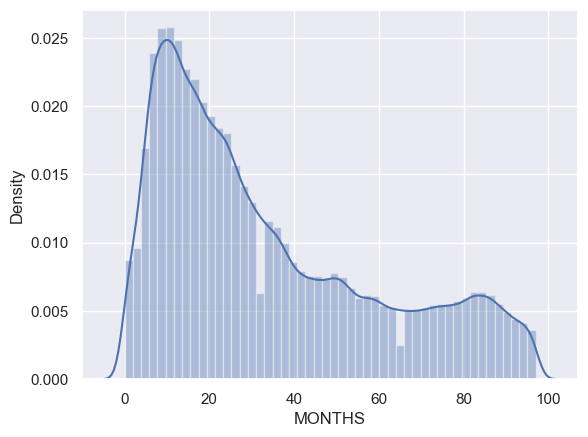

In [185]:
sns.distplot(previous_data['MONTHS'])
plt.show()

Most of the Decisions has been taken between 15 to 30months.

MERGING APPLICATION AND PREVIOUS DATA

In [186]:
application_cols_list = application_data.columns.to_list()
application_cols_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Age']

I will choose those columns which i want to work with from here. But i have to take SK_ID_CURR column as that is the common column between these two Dataframe.

In [187]:
application_cols_list = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age','AMT_INCOME_TOTAL','EXT_SOURCE_2','EXT_SOURCE_3']
application_data_to_merge = application_data[application_cols_list]

In [188]:
previous_cols_list = previous_data.columns.to_list()
previous_cols_list

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'MONTHS']

I will choose those columns which i want to work with from here. But i have to take SK_ID_CURR column as that is the common column between these two Dataframe.

In [189]:
previous_cols_list = ["SK_ID_CURR",'AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS', 'MONTHS']
previous_data_to_merge = previous_data[previous_cols_list]

In [190]:
merging_data = pd.merge(application_data_to_merge, previous_data_to_merge, on ='SK_ID_CURR', how = 'left')
merging_data.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100003       0           F               Higher education   
3      100003       0           F               Higher education   
4      100004       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS  Age  AMT_INCOME_TOTAL  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Single / not married   26          202500.0      0.262949      0.139376   
1               Married   46          270000.0      0.622246      0.510853   
2               Married   46          270000.0      0.622246      0.510853   
3               Married   46          270000.0      0.622246      0.510853   
4  Single / not married   52           67500.0      0.555912      0.729567   

   AMT_CREDIT  AMT_APPLICATION  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  \
0   179055.00         179055.0         179055.0    9251.7750         24.0   
1   594672.75         508738.5         508738.5   40912.3575         12.0   
2   348637.50         337500.0         337500.0   40912.3575          6.0   
3    68053.50          68809.5          68809.5    6737.3100         12.0   
4    20106.00          24282.0          24282.0    5357.2500          4.0   

  NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  MONTHS  
0     Consumer loans             Approved    20.0  
1         Cash loans             Approved    25.0  
2     Consumer loans             Approved    28.0  
3     Consumer loans             Approved    78.0  
4     Consumer loans             Approved    27.0

In [191]:
merging_data.shape

(1110636, 17)

In [192]:
merging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110636 entries, 0 to 1110635
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1110636 non-null  int64  
 1   TARGET                1110636 non-null  int64  
 2   CODE_GENDER           1110636 non-null  object 
 3   NAME_EDUCATION_TYPE   1110636 non-null  object 
 4   NAME_FAMILY_STATUS    1110636 non-null  object 
 5   Age                   1110636 non-null  int64  
 6   AMT_INCOME_TOTAL      1110636 non-null  float64
 7   EXT_SOURCE_2          1110636 non-null  float64
 8   EXT_SOURCE_3          1110636 non-null  float64
 9   AMT_CREDIT            1093218 non-null  float64
 10  AMT_APPLICATION       1093218 non-null  float64
 11  AMT_GOODS_PRICE       1093218 non-null  float64
 12  AMT_ANNUITY           1093218 non-null  float64
 13  CNT_PAYMENT           1093218 non-null  float64
 14  NAME_CONTRACT_TYPE    1093218 non-

In [193]:
merging_data.TARGET

0          1
1          0
2          0
3          0
4          0
          ..
1110631    0
1110632    0
1110633    0
1110634    0
1110635    0
Name: TARGET, Length: 1110636, dtype: int64

Percentage of credit with respect to the no. of application

In [194]:
merging_data['PERCENT_CREDIT'] = round(merging_data['AMT_CREDIT'] // merging_data['AMT_APPLICATION'])

In [195]:
merging_data.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100003       0           F               Higher education   
3      100003       0           F               Higher education   
4      100004       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS  Age  AMT_INCOME_TOTAL  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Single / not married   26          202500.0      0.262949      0.139376   
1               Married   46          270000.0      0.622246      0.510853   
2               Married   46          270000.0      0.622246      0.510853   
3               Married   46          270000.0      0.622246      0.510853   
4  Single / not married   52           67500.0      0.555912      0.729567   

   AMT_CREDIT  AMT_APPLICATION  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  \
0   179055.00         179055.0         179055.0    9251.7750         24.0   
1   594672.75         508738.5         508738.5   40912.3575         12.0   
2   348637.50         337500.0         337500.0   40912.3575          6.0   
3    68053.50          68809.5          68809.5    6737.3100         12.0   
4    20106.00          24282.0          24282.0    5357.2500          4.0   

  NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  MONTHS  PERCENT_CREDIT  
0     Consumer loans             Approved    20.0             1.0  
1         Cash loans             Approved    25.0             1.0  
2     Consumer loans             Approved    28.0             1.0  
3     Consumer loans             Approved    78.0             0.0  
4     Consumer loans             Approved    27.0             0.0

UNIVARIATE ANALYSIS

NAME_CONTRACT_TYPE

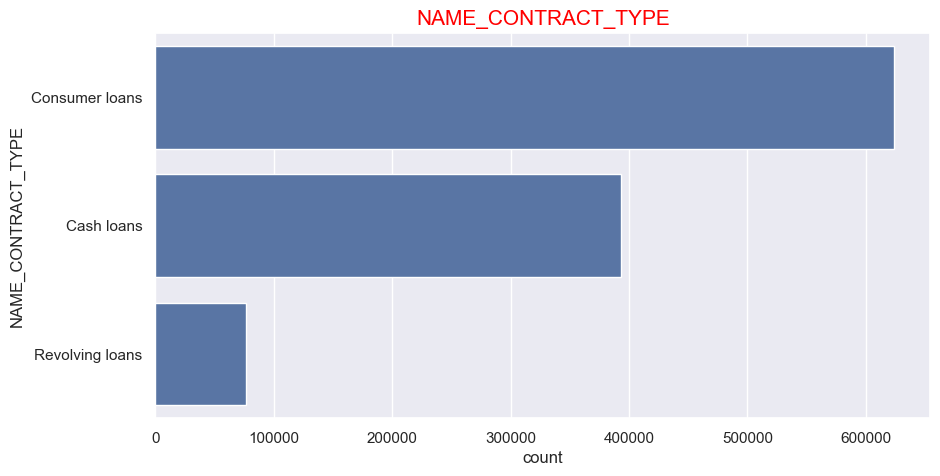

In [196]:
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_CONTRACT_TYPE)
plt.title('NAME_CONTRACT_TYPE', color = 'red', fontsize =15)
plt.show()

NAME_CONTRACT_STATUS

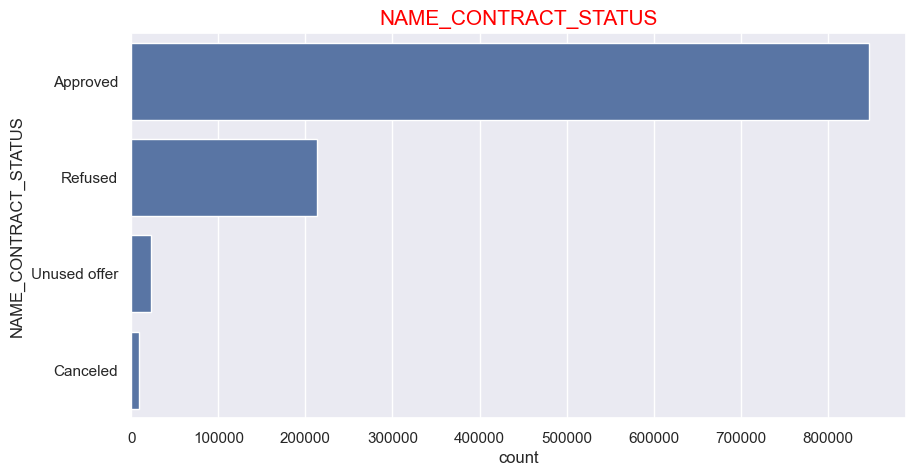

In [197]:
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_CONTRACT_STATUS)
plt.title('NAME_CONTRACT_STATUS', color = 'red', fontsize =15)
plt.show()

NAME_EDUCATION_TYPE

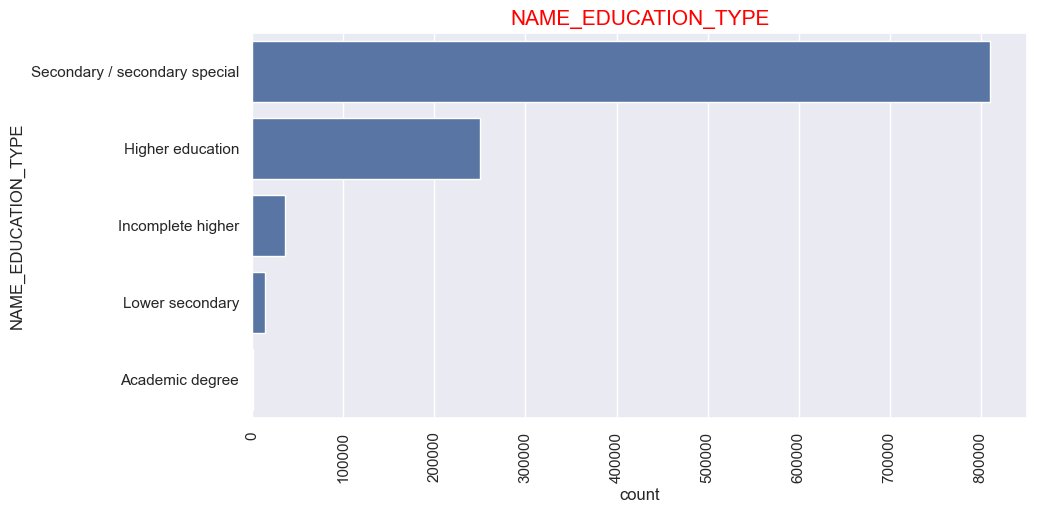

In [198]:
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_EDUCATION_TYPE)
plt.title('NAME_EDUCATION_TYPE', color = 'red', fontsize =15)
plt.xticks(rotation = 90)
plt.show()

Continious Univariate Analysis

CREDIT LOAN AMOUNT

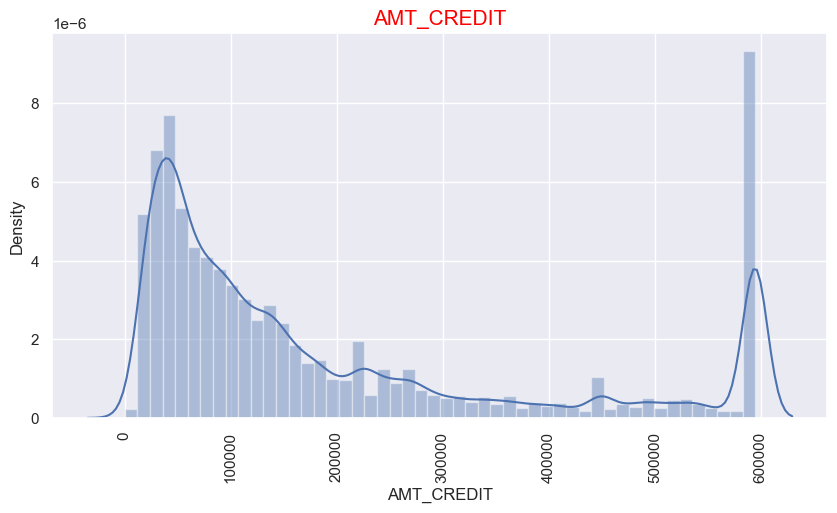

In [200]:
plt.figure(figsize = (10,5))

sns.distplot(merging_data.AMT_CREDIT)
plt.title('AMT_CREDIT', color = 'red', fontsize =15)
plt.xticks(rotation = 90)
plt.show()

Mostle Credited amount has been distributed between 50k to 1.5 lakhs but also there is a 6 lakhs one

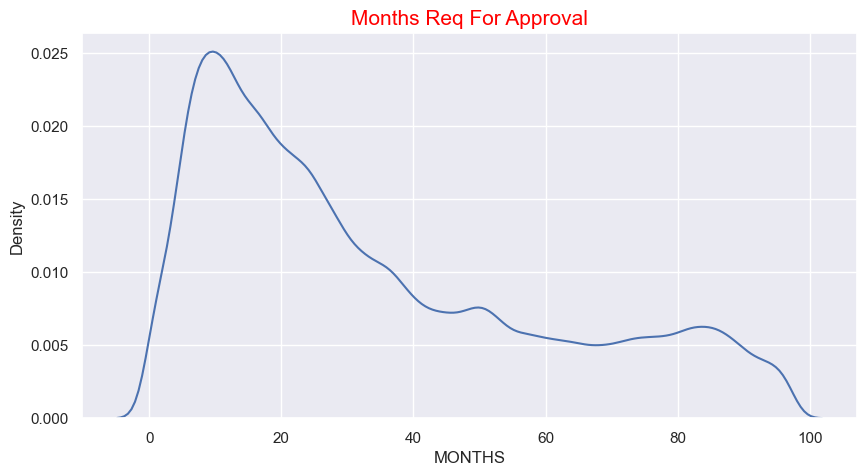

In [201]:
plt.figure(figsize=(10,5))
sns.distplot(merging_data['MONTHS'],hist=False)
plt.title('Months Req For Approval', color = 'red', fontsize = 15)
plt.show()

Most of the decisions has been taken by 15 to 30 months. Some are taken 100 months which is highest time taken to make any decision for the request.

Bivariate Analysis

In [202]:
merging_data_corr = merging_data[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'PERCENT_CREDIT', 'MONTHS']]
merging_data_corr.head()

AMT_CREDIT  AMT_APPLICATION  AMT_ANNUITY  CNT_PAYMENT  PERCENT_CREDIT  \
0   179055.00         179055.0    9251.7750         24.0             1.0   
1   594672.75         508738.5   40912.3575         12.0             1.0   
2   348637.50         337500.0   40912.3575          6.0             1.0   
3    68053.50          68809.5    6737.3100         12.0             0.0   
4    20106.00          24282.0    5357.2500          4.0             0.0   

   MONTHS  
0    20.0  
1    25.0  
2    28.0  
3    78.0  
4    27.0

In [203]:
merging_data_corr.corr()

AMT_CREDIT  AMT_APPLICATION  AMT_ANNUITY  CNT_PAYMENT  \
AMT_CREDIT         1.000000         0.990011     0.859261     0.714324   
AMT_APPLICATION    0.990011         1.000000     0.863717     0.686191   
AMT_ANNUITY        0.859261         0.863717     1.000000     0.473305   
CNT_PAYMENT        0.714324         0.686191     0.473305     1.000000   
PERCENT_CREDIT     0.402734         0.365647     0.327690     0.331645   
MONTHS            -0.369853        -0.364576    -0.307076    -0.231682   

                 PERCENT_CREDIT    MONTHS  
AMT_CREDIT             0.402734 -0.369853  
AMT_APPLICATION        0.365647 -0.364576  
AMT_ANNUITY            0.327690 -0.307076  
CNT_PAYMENT            0.331645 -0.231682  
PERCENT_CREDIT         1.000000 -0.459184  
MONTHS                -0.459184  1.000000

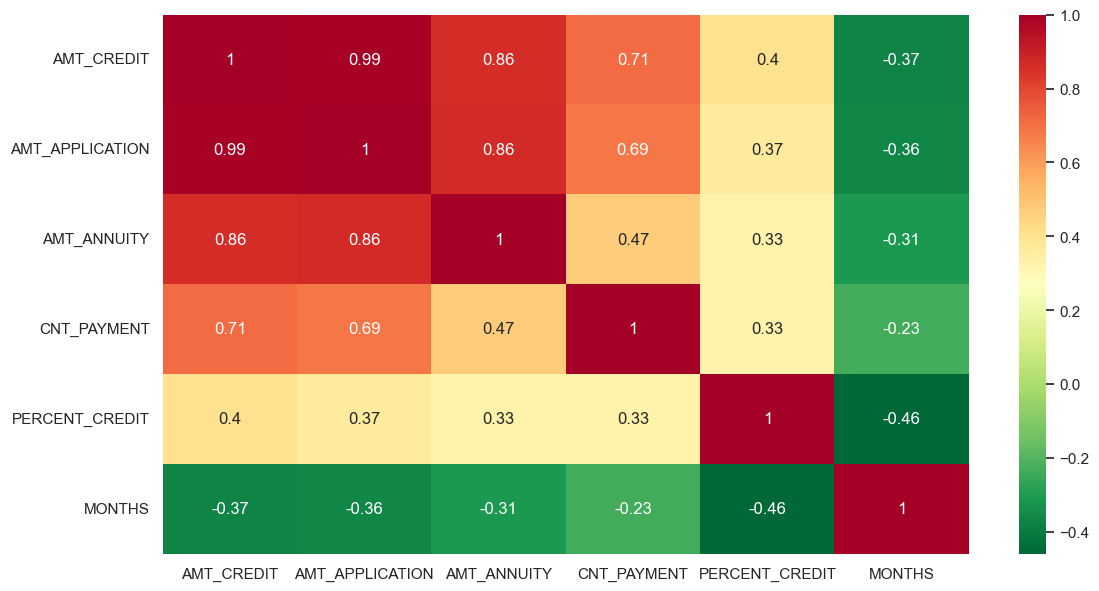

In [204]:
plt.figure(figsize = (13,7))
sns.heatmap(merging_data_corr.corr(), cmap = 'RdYlGn_r', annot = True )
plt.show()

Summary:

1. AMT_CREDIT & AMT_APPLICATION : Highly correlated, nearly 99%.
2. AMT_CREDIT & AMT_ANNUITY : Highly Correlated, nearly 86%.
3. AMT_ANNUITY & AMT_APPLICATION : Highly correlated, nearly 86%.

In [205]:
column_lists = ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

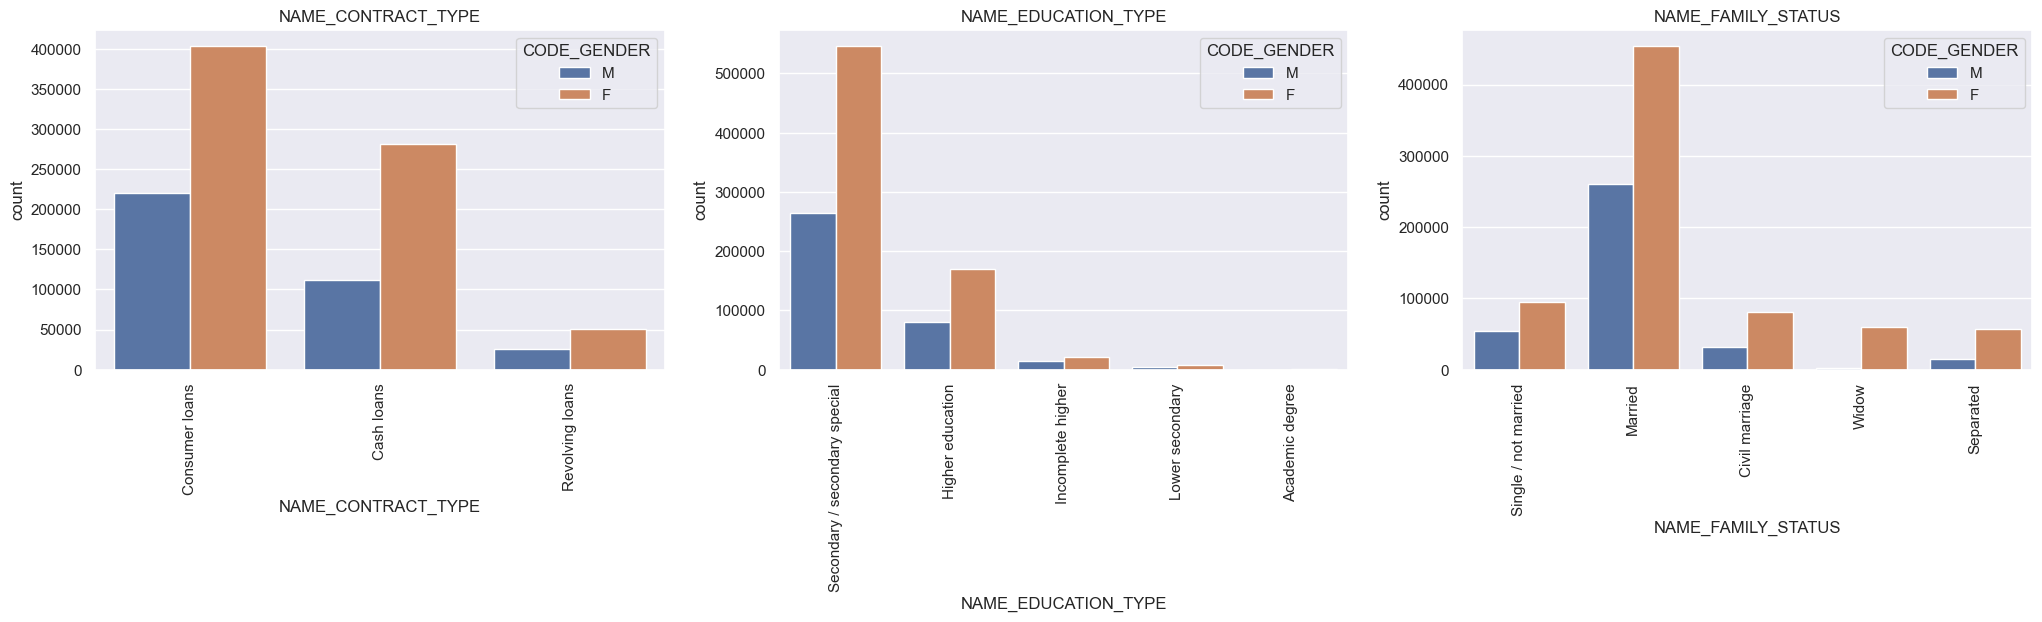

In [206]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'CODE_GENDER',data = merging_data)
    plt.xticks(rotation = 90)
    plt.title(column)

Summary:

1. Consumer loans are more taken by Female than Male.
2. Secondary/Secondary Special Education type of female are more than male.
3. More Married female member are taken loans compare to male.

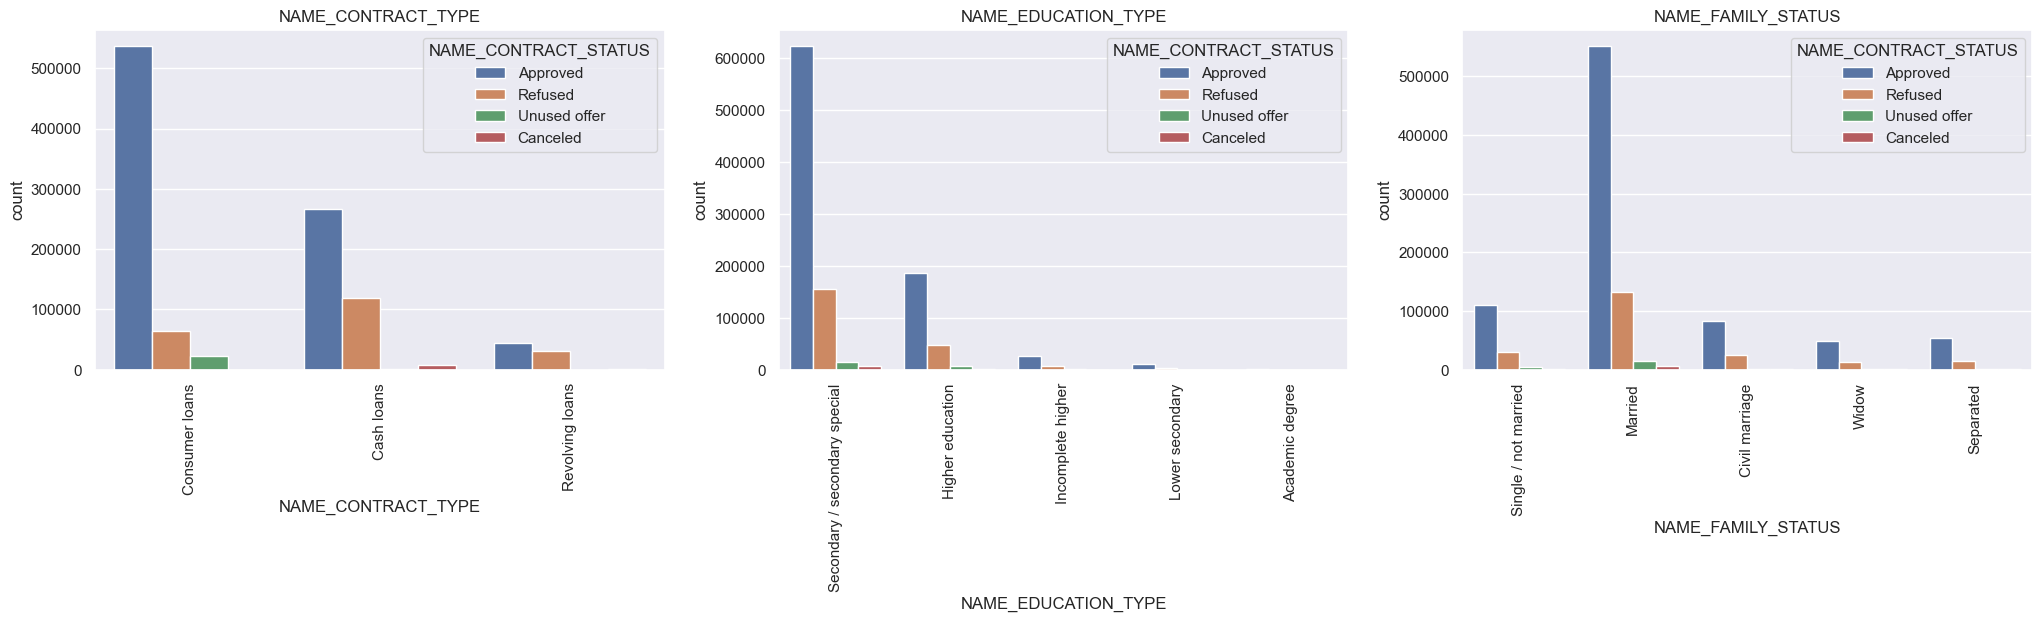

In [208]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'NAME_CONTRACT_STATUS',data = merging_data)
    plt.xticks(rotation = 90)
    plt.title(column)

Summary:

1. Highest no. of contract got approval in consumer Loans.
2. Highest no. of contract got approval in secondary /secondary special education type.
3. Highest no. of contract got approved to those who are married.

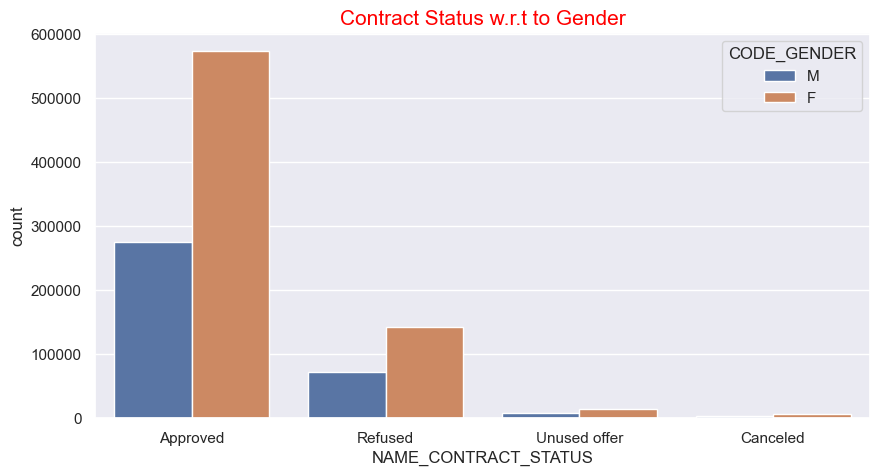

In [209]:
plt.figure(figsize = (10,5))

sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER", data = merging_data)
plt.title('Contract Status w.r.t to Gender', color = 'red', fontsize = '15')
plt.show()

Summary:

1. Female contracts got approved more compared to male.
2. Female contracts also got refused more compare to male but that is nearly negligible and Less in numbers compare to approval.

In [210]:
merging_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'Age', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_CREDIT', 'AMT_APPLICATION', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_PAYMENT', 'NAME_CONTRACT_TYPE',
       'NAME_CONTRACT_STATUS', 'MONTHS', 'PERCENT_CREDIT'],
      dtype='object')

In [211]:
merge_target_value_0 = merging_data[(merging_data.TARGET == 0)]
merge_target_value_0.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
1      100003       0           F               Higher education   
2      100003       0           F               Higher education   
3      100003       0           F               Higher education   
4      100004       0           M  Secondary / secondary special   
5      100006       0           F  Secondary / secondary special   

     NAME_FAMILY_STATUS  Age  AMT_INCOME_TOTAL  EXT_SOURCE_2  EXT_SOURCE_3  \
1               Married   46          270000.0      0.622246      0.510853   
2               Married   46          270000.0      0.622246      0.510853   
3               Married   46          270000.0      0.622246      0.510853   
4  Single / not married   52           67500.0      0.555912      0.729567   
5        Civil marriage   52          135000.0      0.650442      0.510853   

   AMT_CREDIT  AMT_APPLICATION  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  \
1   594672.75         508738.5         508738.5   40912.3575         12.0   
2   348637.50         337500.0         337500.0   40912.3575          6.0   
3    68053.50          68809.5          68809.5    6737.3100         12.0   
4    20106.00          24282.0          24282.0    5357.2500          4.0   
5   594672.75         508738.5         508738.5   24246.0000         48.0   

  NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  MONTHS  PERCENT_CREDIT  
1         Cash loans             Approved    25.0             1.0  
2     Consumer loans             Approved    28.0             1.0  
3     Consumer loans             Approved    78.0             0.0  
4     Consumer loans             Approved    27.0             0.0  
5         Cash loans             Approved     6.0             1.0

In [212]:
merge_target_value_1 = merging_data[(merging_data.TARGET == 1)]
merge_target_value_1.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0        100002       1           M  Secondary / secondary special   
87       100031       1           F  Secondary / secondary special   
136      100047       1           M  Secondary / secondary special   
137      100047       1           M  Secondary / secondary special   
138      100047       1           M  Secondary / secondary special   

       NAME_FAMILY_STATUS  Age  AMT_INCOME_TOTAL  EXT_SOURCE_2  EXT_SOURCE_3  \
0    Single / not married   26          202500.0      0.262949      0.139376   
87                  Widow   51          112500.0      0.548477      0.190706   
136               Married   48          202500.0      0.306841      0.320163   
137               Married   48          202500.0      0.306841      0.320163   
138               Married   48          202500.0      0.306841      0.320163   

     AMT_CREDIT  AMT_APPLICATION  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  \
0     179055.00         179055.0         179055.0     9251.775         24.0   
87          NaN              NaN              NaN          NaN          NaN   
136   157500.00         157500.0         157500.0    11117.700         24.0   
137   594672.75         508738.5         508738.5    31674.870         36.0   
138    34384.50          38205.0          38205.0     4586.895         10.0   

    NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  MONTHS  PERCENT_CREDIT  
0       Consumer loans             Approved    20.0             1.0  
87                 NaN                  NaN     NaN             NaN  
136         Cash loans             Approved    49.0             1.0  
137         Cash loans              Refused    36.0             1.0  
138     Consumer loans             Approved    88.0             0.0

Bivariate using Target Variable:

DEFAULTERS CORRELATION

In [213]:
cols_list = ['Age', 'AMT_INCOME_TOTAL','AMT_ANNUITY', 'CNT_PAYMENT', 'NAME_CONTRACT_TYPE']

In [214]:
merge_corr_for_defaulters = merge_target_value_1[cols_list]
merge_corr_for_defaulters.head()

Age  AMT_INCOME_TOTAL  AMT_ANNUITY  CNT_PAYMENT NAME_CONTRACT_TYPE
0     26          202500.0     9251.775         24.0     Consumer loans
87    51          112500.0          NaN          NaN                NaN
136   48          202500.0    11117.700         24.0         Cash loans
137   48          202500.0    31674.870         36.0         Cash loans
138   48          202500.0     4586.895         10.0     Consumer loans

In [216]:
numeric_data = merge_corr_for_defaulters.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix

Age  AMT_INCOME_TOTAL  AMT_ANNUITY  CNT_PAYMENT
Age               1.000000          0.013481     0.130518     0.170333
AMT_INCOME_TOTAL  0.013481          1.000000     0.224759     0.059095
AMT_ANNUITY       0.130518          0.224759     1.000000     0.540806
CNT_PAYMENT       0.170333          0.059095     0.540806     1.000000

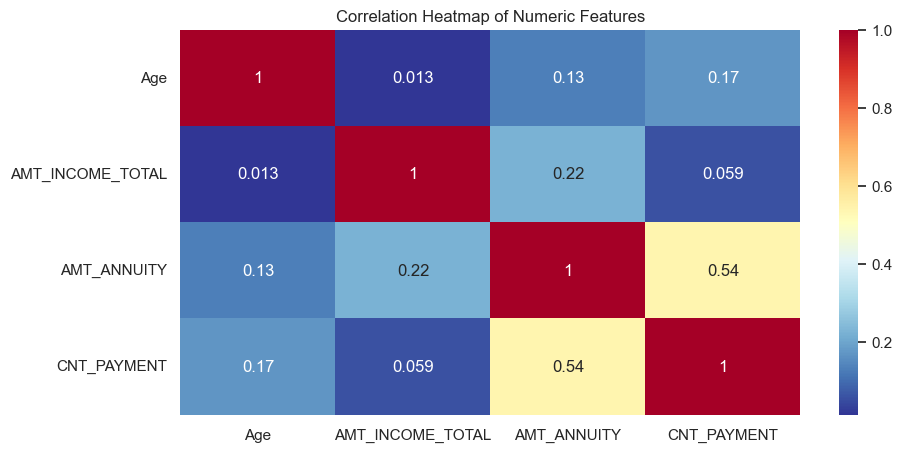

In [218]:
# Filter only numeric columns
numeric_data = merge_corr_for_defaulters.select_dtypes(include='number')

# Create heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), cmap='RdYlBu_r', annot=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

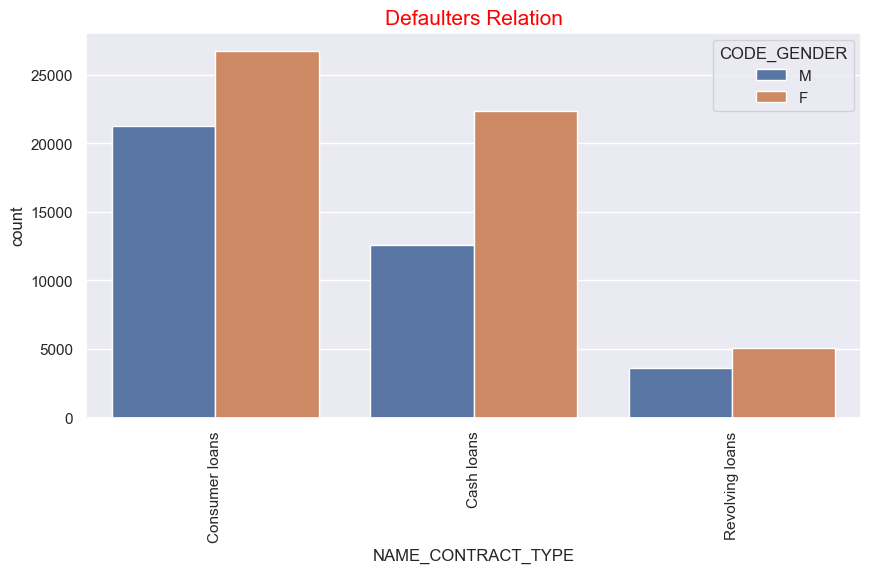

In [219]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_CONTRACT_TYPE,hue = merge_target_value_1.CODE_GENDER, data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

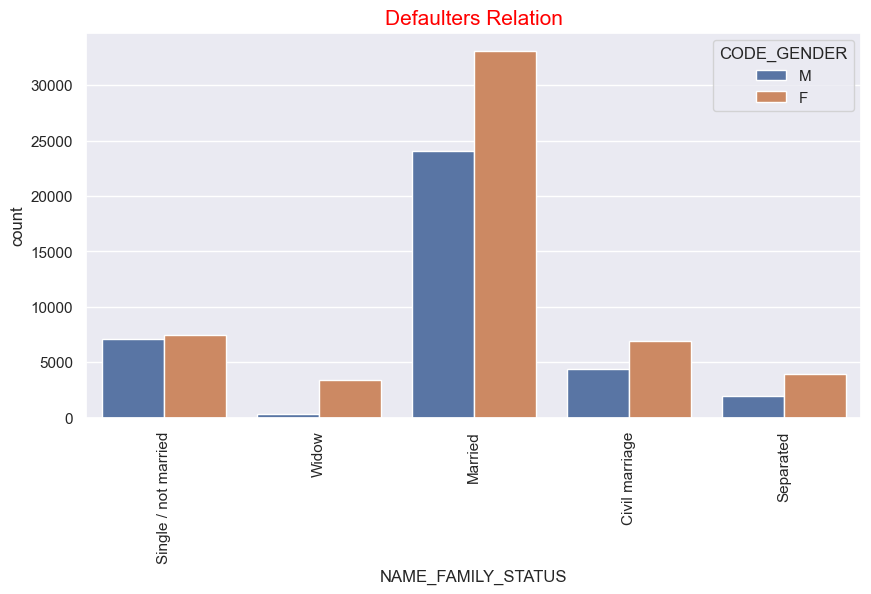

In [220]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_FAMILY_STATUS,hue = merge_target_value_1.CODE_GENDER, data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

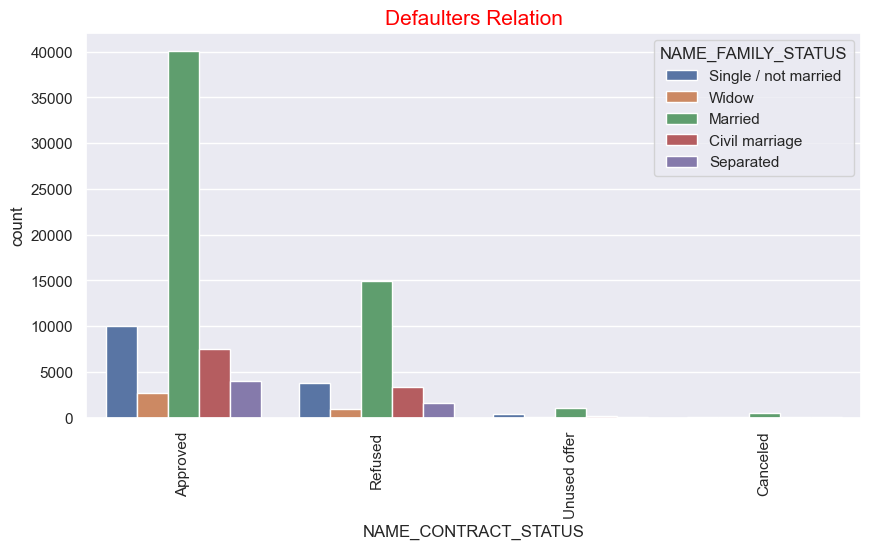

In [221]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_CONTRACT_STATUS,hue = merge_target_value_1.NAME_FAMILY_STATUS, data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

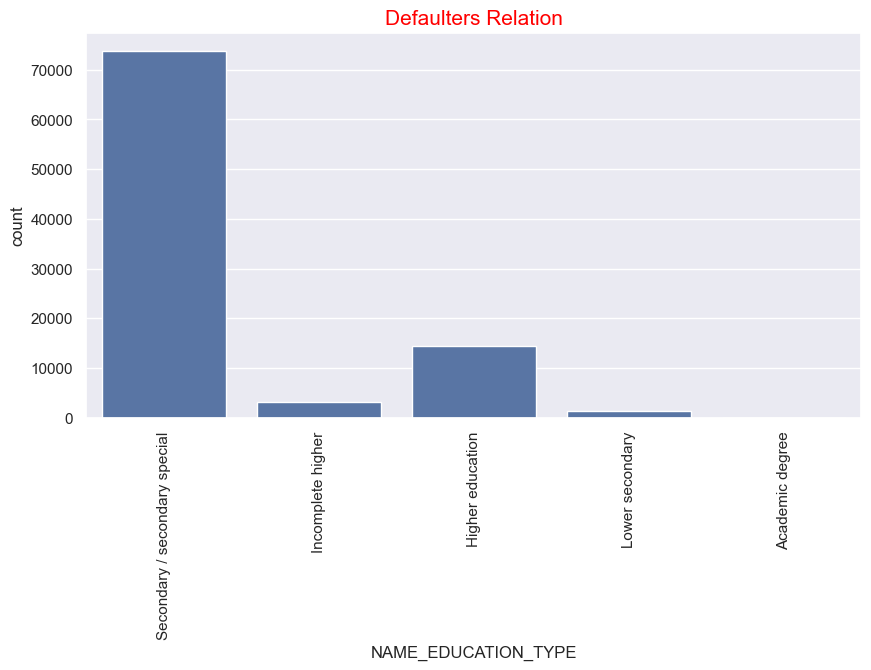

In [222]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_target_value_1.NAME_EDUCATION_TYPE,data = merge_target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

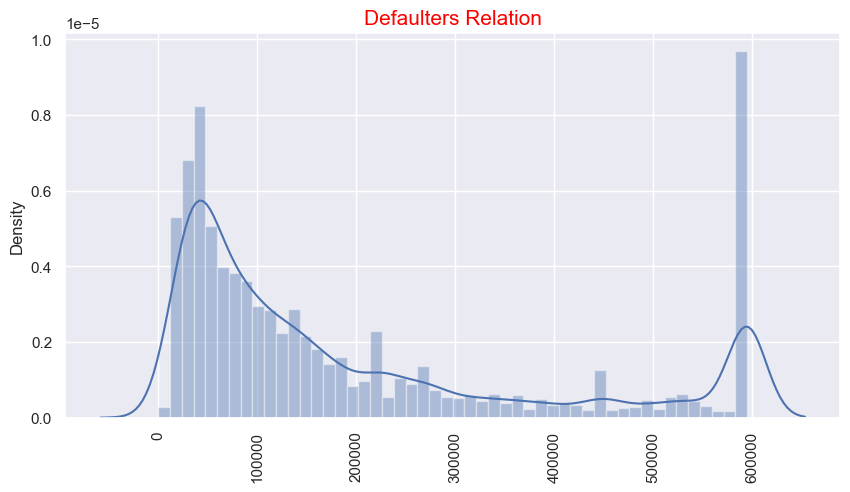

In [223]:
plt.figure(figsize = (10,5))
sns.distplot(x = merge_target_value_1.AMT_CREDIT)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

CONCLUSION
1. In Contract type, female with consumer loans type are in more no of defaulters.
2. Married people are struggling to pay the loan bill compared to single and separated people. More no of approved people are married. From next time onwards we need to give loan to those who are either single or divorced.
3. Secondary/ secondary special people with education are struggling to pay their loan bill and becoming defaulters.
4. Lower credit amount people else really higher credit amount people are having high chance to becoming a defaulters.
5. Female Gender are more likely to not face payment difficulties then the male and hence it is recommended to approve more loans of Female Gender than the male gender at the same Female are High in number than who face difficulties than males.
6. The Repeater applicant has High chance of non-Defaulting and also has high chance of defaulting when compared to new applicants.